# Exclusive Chopin Midi

In [115]:
import requests
import re
from bs4 import BeautifulSoup
import wget
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Scraping from Classical Piano Midi Page

In [2]:
# function to download midi files after retrieving composer links
def download_links_from_composer_links(composer_str):
#     request composer's page based on link retrieved in link.get('href')
    html_page = requests.get(f"http://www.piano-midi.de/{composer_str}")
#     transform with bs4 for html read out 
    soup = BeautifulSoup(html_page.content, 'html.parser')
#     search html for midi file link in each table and download
    for table in soup.findAll('table', 'midi'):
        for link in table.findAll('a'):
#           print each file found per composer
            print(link.get('href')[-3:])
#           download only the midi files
            if link.get('href')[-3:] == 'mid':
                wget.download('http://www.piano-midi.de/{}'.format(link.get('href')))

In [20]:
# set variable to Classical Piano Midi webpage
html_page = requests.get("http://www.piano-midi.de/midi_files.htm")
# from webpage, retrieve table of composers
composers_soup = BeautifulSoup(html_page.content, 'html.parser')
composer_table = composers_soup.find('table', 'midi')
# loop through table of composers and retrieve chopin's link to feed to dl function
for link in composer_table.findAll('a', attrs={'href': 'chopin.htm'}):
    print(link.get('href'))
    # use function to pass composer links
    download_links_from_composer_links(link.get('href'))

chopin.htm
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
wmv
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
mid
mid
mp3
ogg
pdf
mid
mid
mp3
ogg
mid
mid
mp3
ogg


## Scraping from Midi World

In [4]:
# function to parse through Midiworld.com and pull Chopin's page
def find_chopin(str):
    html_pg = requests.get(str)
    composer_pg = BeautifulSoup(html_pg.content, 'html.parser')
    find_it = composer_pg.findAll('a', attrs={'href': 'chopin.htm'})
    for i in find_it:
        compr = i.get('href')
    base = 'https://www.midiworld.com/'
    end = compr
    chopin = base + end
    return chopin

In [5]:
find_chopin('https://www.midiworld.com/composers.htm')

'https://www.midiworld.com/chopin.htm'

In [6]:
# running 'find_chopin' now that his url is located
chopin_html = requests.get(find_chopin('https://www.midiworld.com/composers.htm'))
chopin_pg = BeautifulSoup(chopin_html.content, 'html.parser')
# pulling all links on Chopin's page
chopin_links = chopin_pg.findAll('a', attrs={'href': re.compile("^https://")})
# pulling all Chopin midi files 
for link in chopin_links:
    if link.get('href')[-3:] == 'mid':
        print(link.get('href'))
        wget.download(link.get('href'))

https://www.midiworld.com/midis/other/chopin/ballade1.mid
https://www.midiworld.com/midis/other/chopin/ballade2.mid
https://www.midiworld.com/midis/other/chopin/ballade3.mid
https://www.midiworld.com/midis/other/chopin/ballade4.mid
https://www.midiworld.com/midis/other/chopin/chet1001.mid
https://www.midiworld.com/midis/other/chopin/chet1002.mid
https://www.midiworld.com/midis/other/chopin/chet1003.mid
https://www.midiworld.com/midis/other/chopin/chet1004.mid
https://www.midiworld.com/midis/other/chopin/chet1005.mid
https://www.midiworld.com/midis/other/chopin/chet1006.mid
https://www.midiworld.com/midis/other/chopin/chet1007.mid
https://www.midiworld.com/midis/other/chopin/chet1008.mid
https://www.midiworld.com/midis/other/chopin/chet1009.mid
https://www.midiworld.com/midis/other/chopin/chet1010.mid
https://www.midiworld.com/midis/other/chopin/chet1011.mid
https://www.midiworld.com/midis/other/chopin/chet1012.mid
https://www.midiworld.com/midis/other/chopin/chet2501.mid
https://www.mi

## Putting Midi_World Midi into DataFrames

In [7]:
# scraping titile of peices from Chopin midilinks
chopin_titles = []
for link in chopin_links:
    href = link.get('href')
    chopin_titles.append(link.string)

In [8]:
del chopin_titles[0]

In [9]:
df_chopin_titles = pd.DataFrame(chopin_titles)

In [10]:
df_chopin_titles = df_chopin_titles.rename(columns = {0: 'Title'})

In [11]:
df_chopin_titles

Title
0            Op. 23. in Gmin 
1               Op. 38. in F 
2              Op. 47. in Ab 
3            Op. 52. in Fmin 
4         Op. 10. No. 1. in C
..                        ...
96              Op.18. in Eb 
97        Op.64. No. 1. in Db
98    Op.64. No. 2. in C#min 
99      Op. 70. No. 2. in Ab 
100       Op. Posth. in Emin 

[101 rows x 1 columns]

In [12]:
chopin_track_list = []
for link in chopin_links:
    if link.get('href')[-3:] == 'mid':
        chopin_track_list.append(link.get('href'))
chopin_track_list

['https://www.midiworld.com/midis/other/chopin/ballade1.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade2.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade3.mid',
 'https://www.midiworld.com/midis/other/chopin/ballade4.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1001.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1002.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1003.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1004.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1005.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1006.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1007.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1008.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1009.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1010.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1011.mid',
 'https://www.midiworld.com/midis/other/chopin/chet1012.mid',
 'https:

In [13]:
df_chopin_track_list = pd.DataFrame(chopin_track_list)

In [16]:
df_chopin_track_list = df_chopin_track_list.rename(columns = {0: 'midi_link'})

In [17]:
df_chopin_track_list

midi_link
0    https://www.midiworld.com/midis/other/chopin/b...
1    https://www.midiworld.com/midis/other/chopin/b...
2    https://www.midiworld.com/midis/other/chopin/b...
3    https://www.midiworld.com/midis/other/chopin/b...
4    https://www.midiworld.com/midis/other/chopin/c...
..                                                 ...
96   https://www.midiworld.com/midis/other/chopin/c...
97   https://www.midiworld.com/midis/other/chopin/c...
98   https://www.midiworld.com/midis/other/chopin/c...
99   https://www.midiworld.com/midis/other/chopin/c...
100  https://www.midiworld.com/midis/other/chopin/c...

[101 rows x 1 columns]

In [18]:
df_chopin_titles['Midi_Link'] = df_chopin_track_list

In [109]:
df_chopin_titles['Midi_Link'][0]

'https://www.midiworld.com/midis/other/chopin/ballade1.mid'

## Paring Files into Sequences
 using Music21

In [1]:
from music21 import converter, instrument, note, chord, stream, key, roman, corpus
import glob
import pickle
import numpy as np
import pretty_midi
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

An example of how Music21 can parse midi_data

In [2]:
# retireving each midi data point in a list

file = "/Volumes/S_4/Music_Box/Scraped_midi_data/Chopin/midi_files/ballade1.mid"
midi = converter.parse(file)
notes_to_parse = midi.flat.notes
for element in notes_to_parse[:10]:
  print(element, element.offset)

<music21.note.Note C> 0.0
<music21.note.Note C> 0.0
<music21.note.Note E-> 6.0
<music21.note.Note E-> 6.0
<music21.note.Note G#> 7.0
<music21.note.Note G#> 7.0
<music21.chord.Chord B-3 B-2> 8.0
<music21.note.Note C> 26/3
<music21.note.Note C> 26/3
<music21.note.Note G#> 28/3


## Visualizing

In [87]:
fs=100
midi_pretty_format = pretty_midi.PrettyMIDI("/Volumes/S_4/Music_Box/Scraped_midi_data/Chopin/midi_files/ballade1.mid")
piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
piano_roll = piano_midi.get_piano_roll(fs=fs)

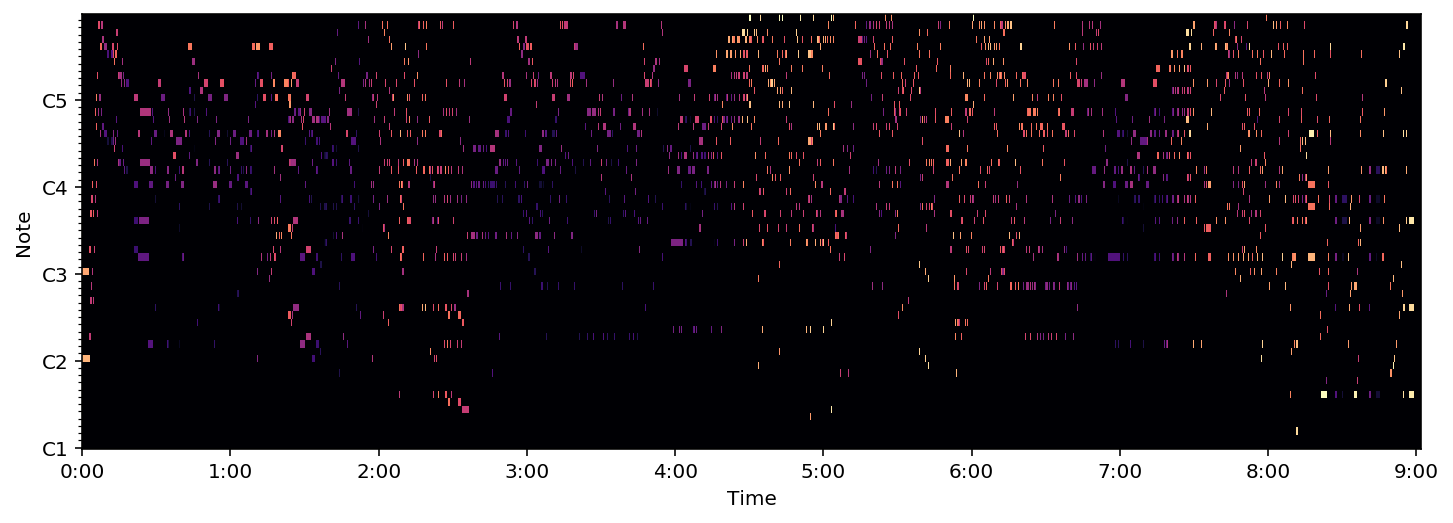

In [88]:
# function to show midi data as data points along a timeline
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)

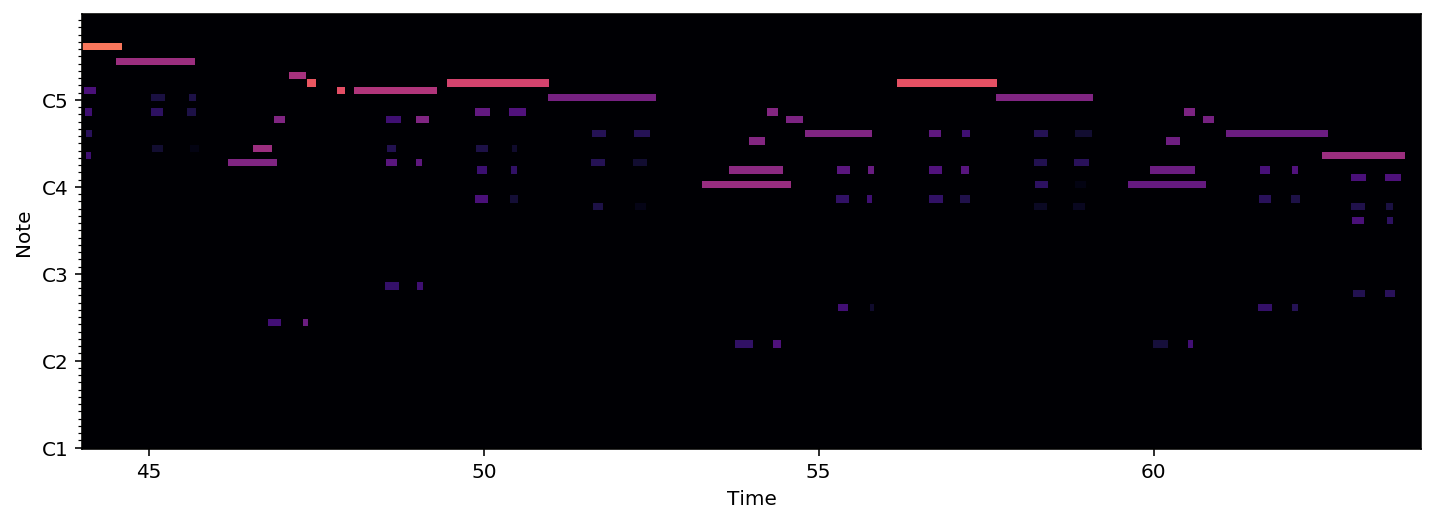

In [98]:
# zooming in to a 20 second frame
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)
ymin, ymax = plt.ylim()
plt.xlim(44,64);

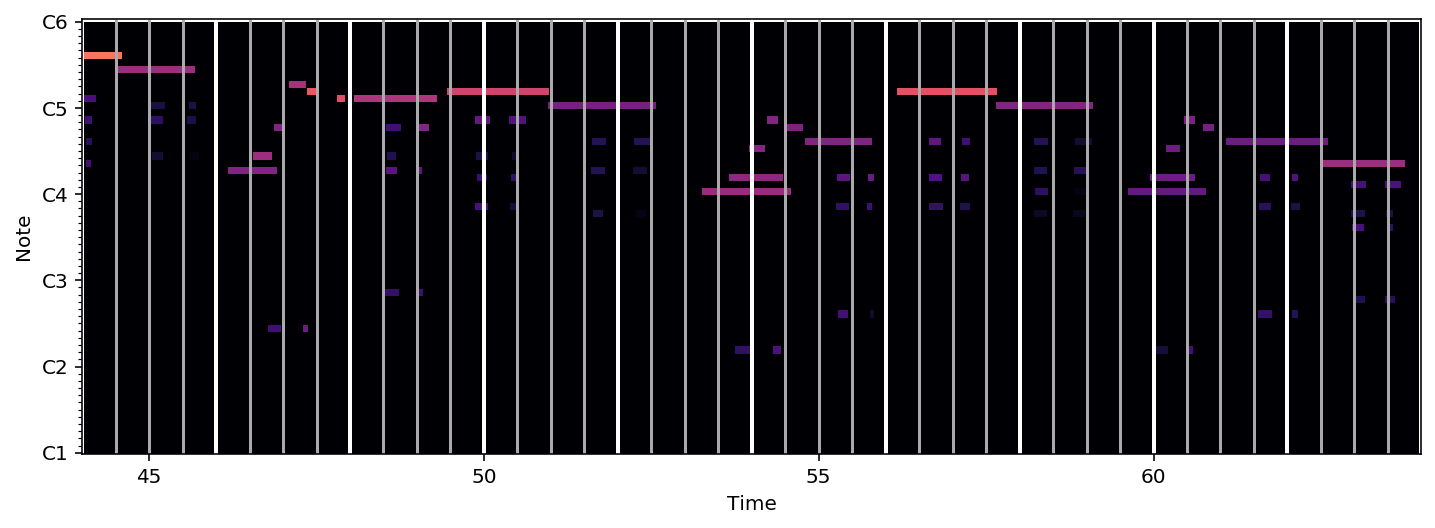

In [99]:
# Get and downbeat times
beats = midi_pretty_format.get_beats()
downbeats = midi_pretty_format.get_downbeats()
# Plot piano roll
plt.figure(figsize=(12, 4))
plot_piano_roll(midi_pretty_format, 24, 84)
ymin, ymax = plt.ylim()
# Plot beats as grey lines, downbeats as white lines
mir_eval.display.events(beats, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(downbeats, base=ymin, height=ymax, color='#FFFFFF', lw=2)
# 20 seconds for clarity
plt.xlim(44, 64);

Text(0, 0.5, 'Proportion')

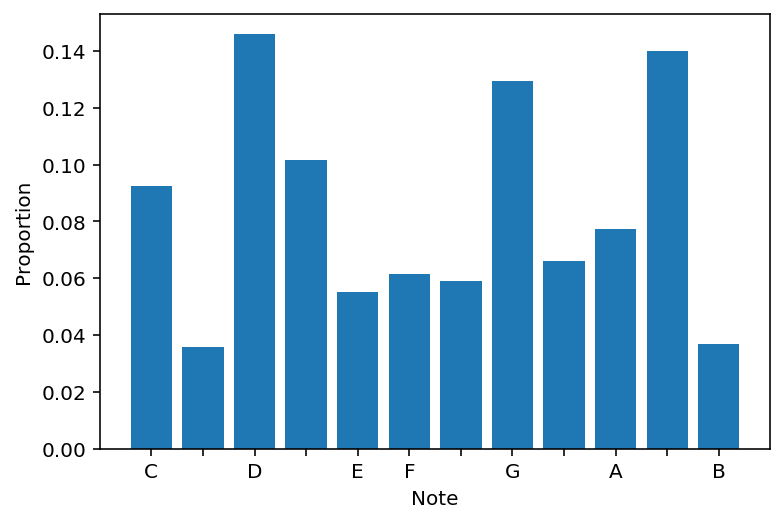

In [100]:
# looking at the peice's pitch set
plt.bar(np.arange(12), midi_pretty_format.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

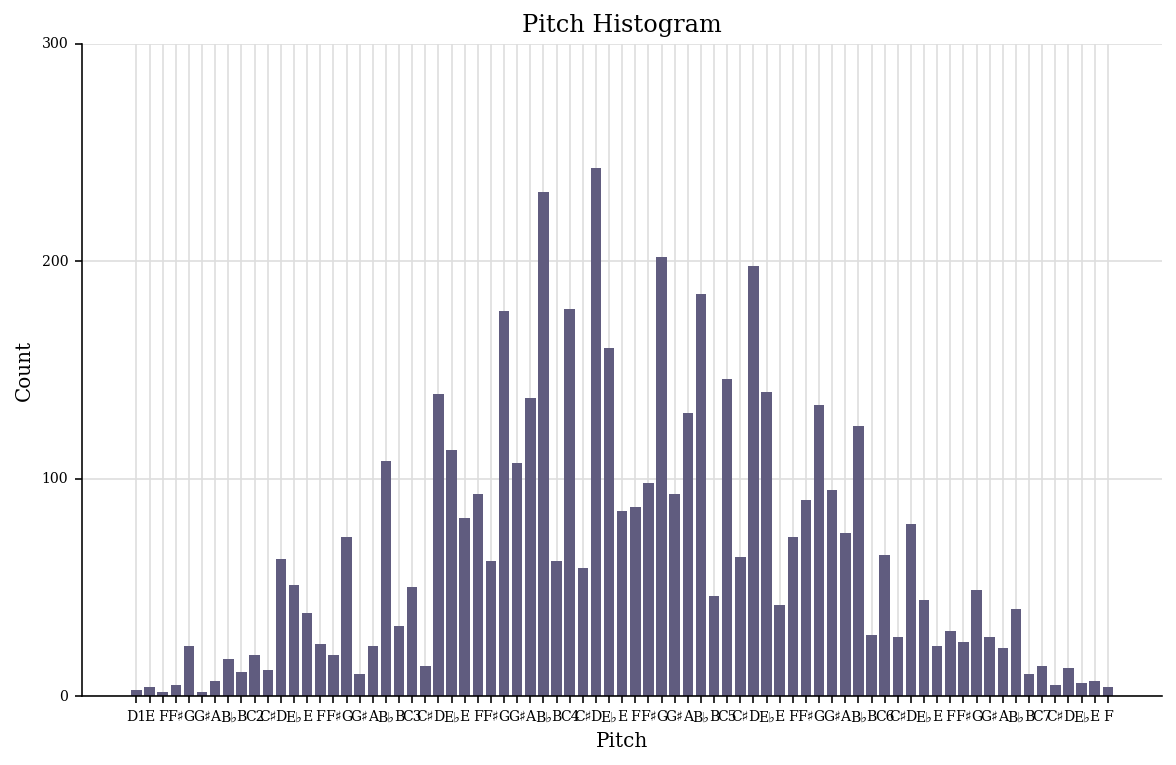

In [130]:
ballade.plot('histogram', 'pitch')

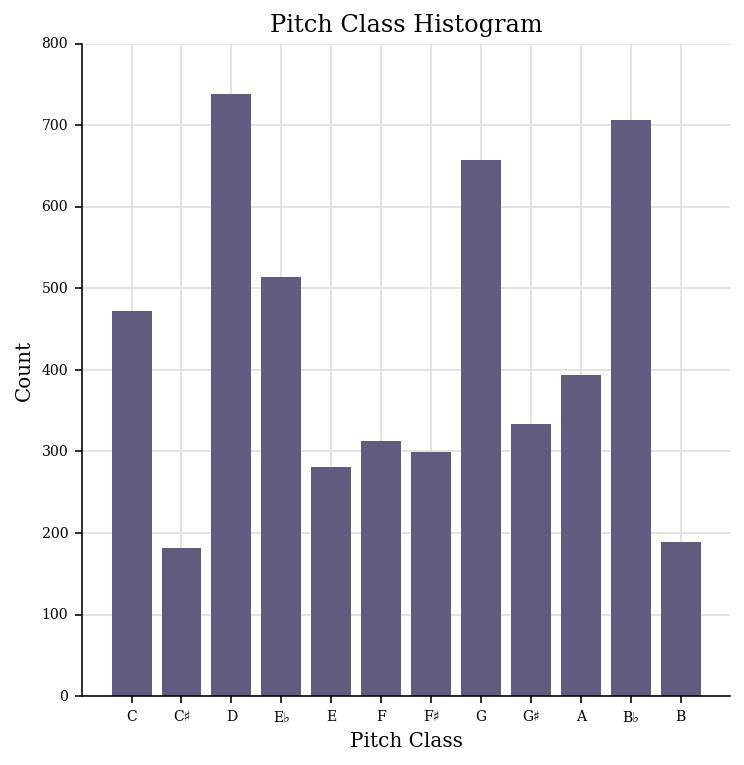

In [136]:
ballade.plot('histogram', 'pitchClass')

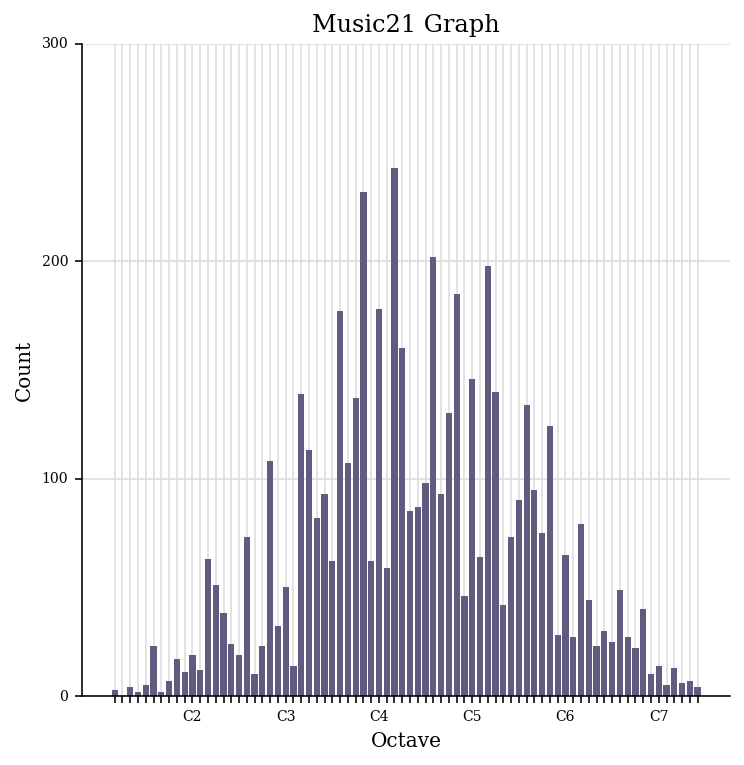

In [135]:
ballade.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

In [131]:
ballade.analyze('key')

<music21.key.Key of g minor>

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 11 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/continue>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>

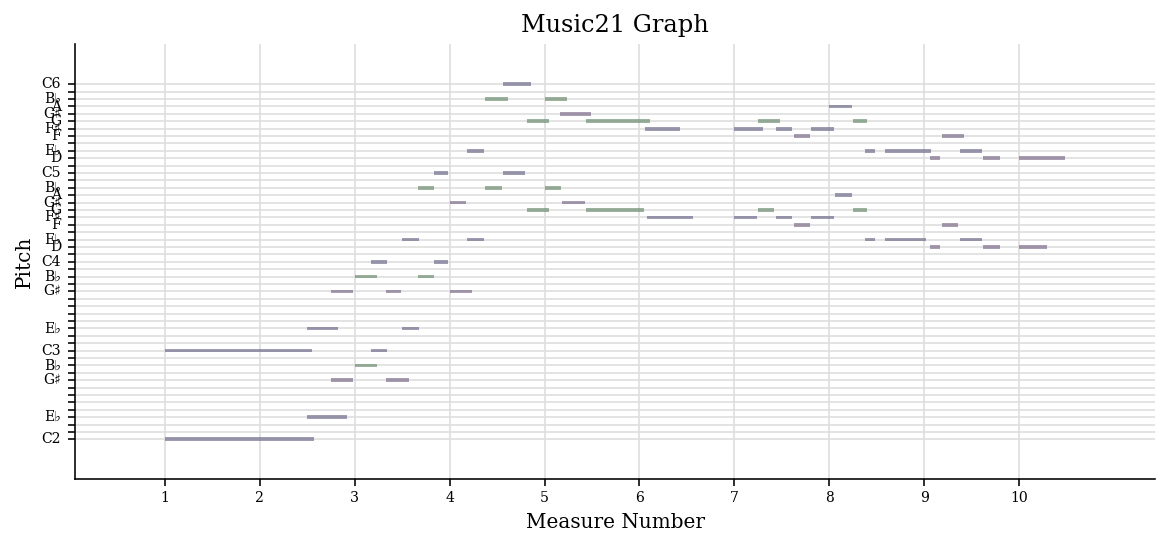

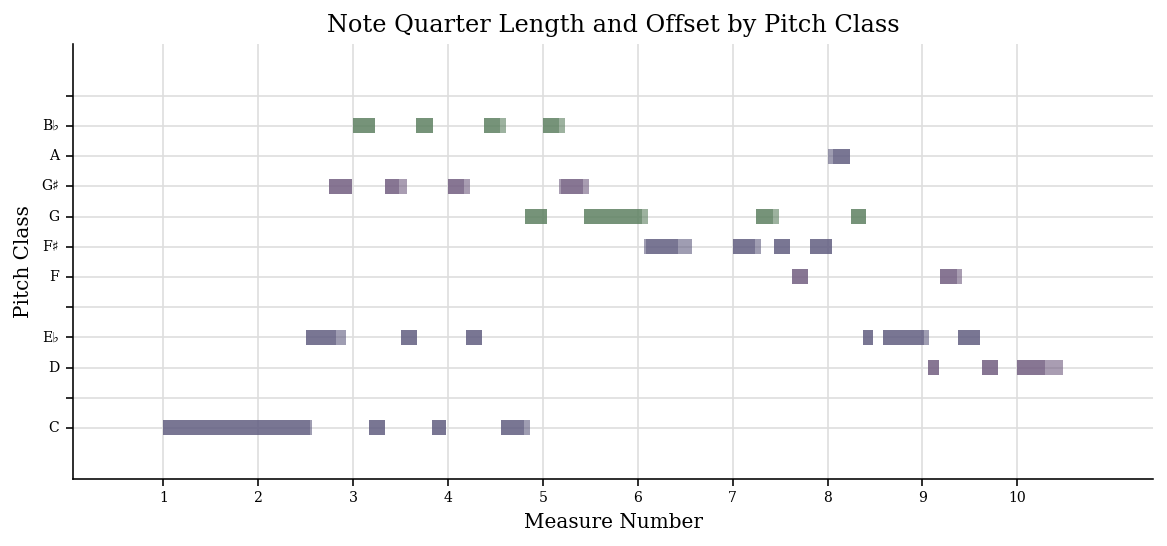

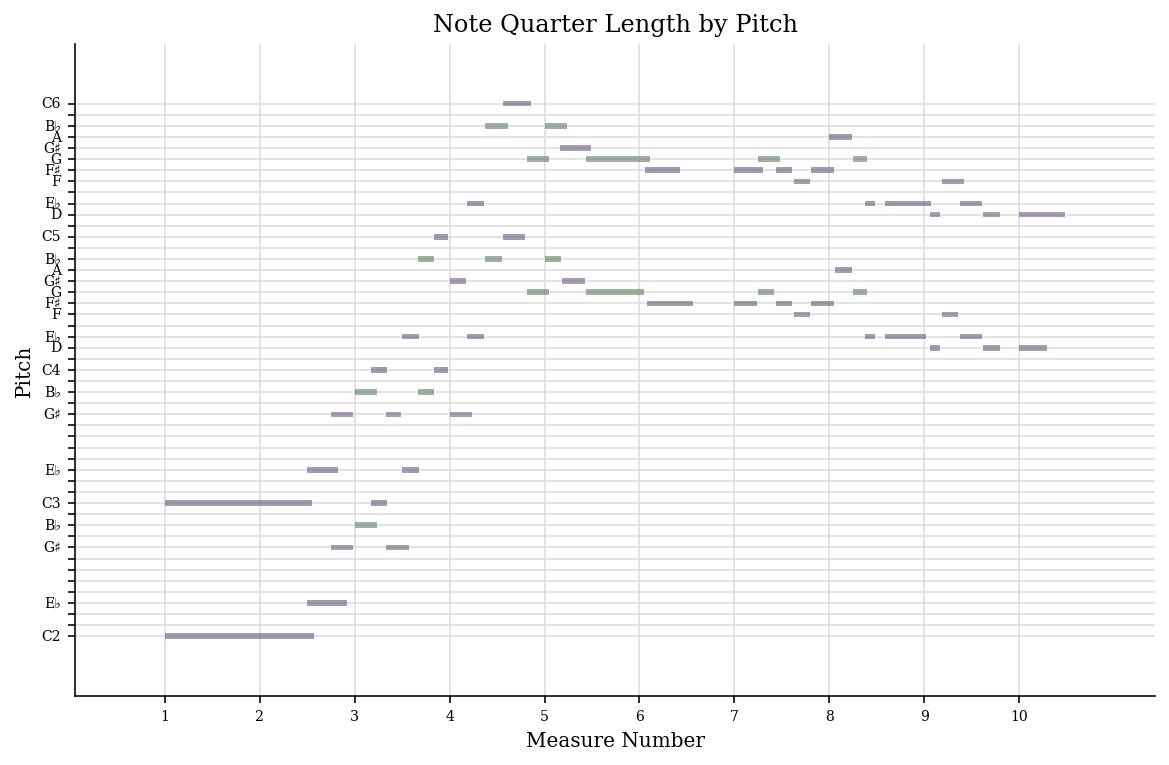

In [126]:
ballade = converter.parse("/Volumes/S_4/Music_Box/Scraped_midi_data/Chopin/midi_files/ballade1.mid")
ballade.measures(1,10).plot('horizontalbar')

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 11 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/continue>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>

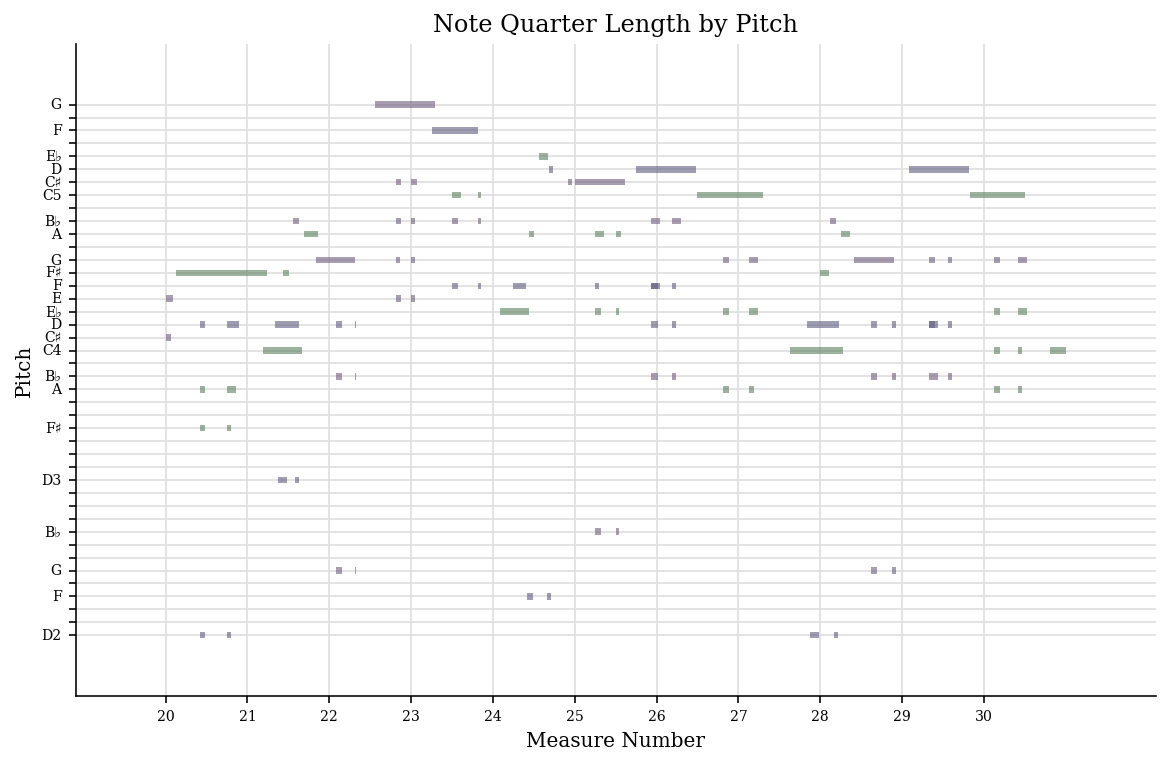

In [117]:
ballade.measures(20,30).plot(dpi = 400)

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 11 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/continue>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>

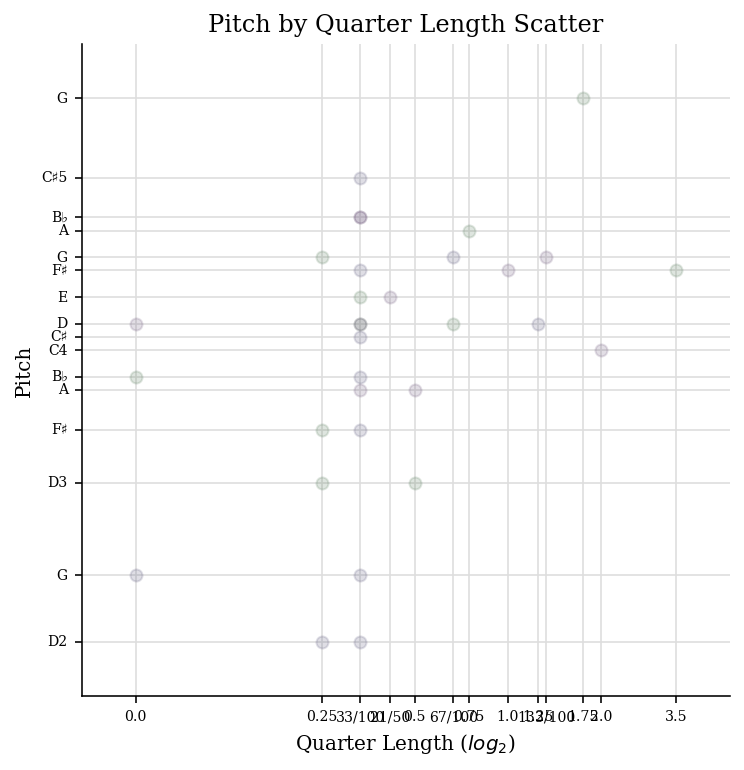

In [137]:
ballade.measures(20,22).plot('scatter', 'quarterLength', 'pitch')

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 11 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/stop>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/continue>/<music21.beam.Beam 2/continue>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>

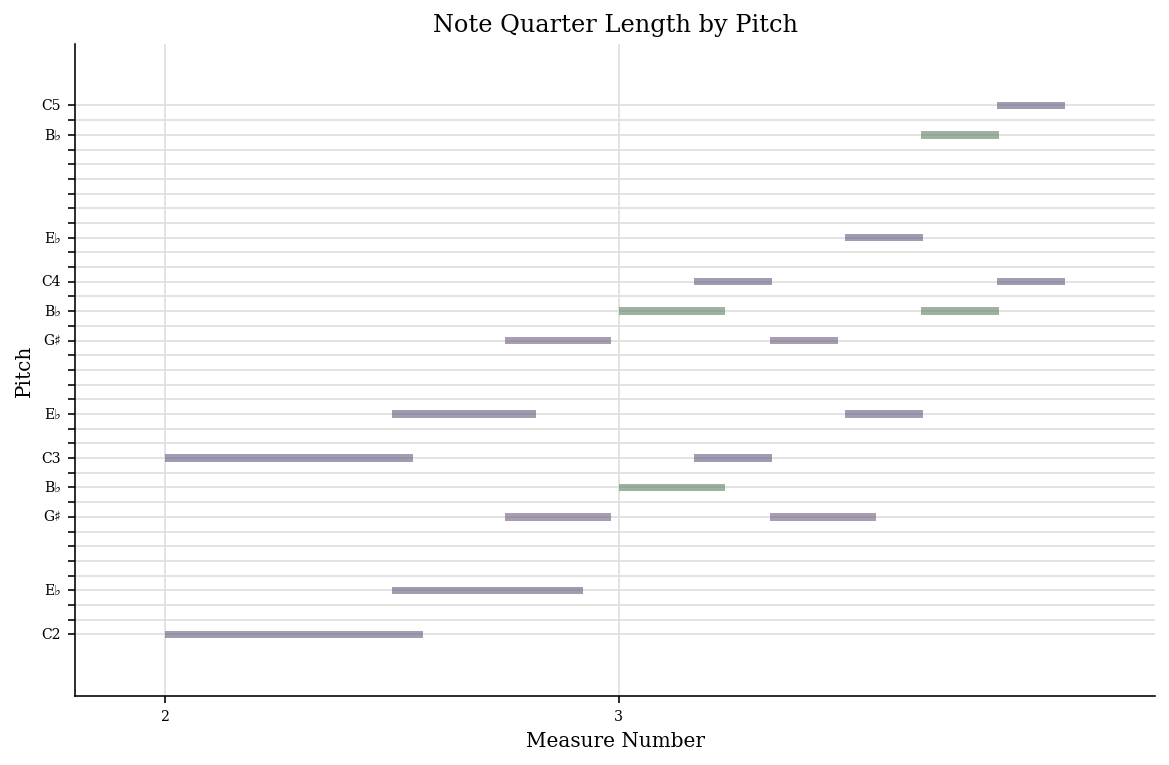

In [134]:
ballade.measures(2,3).plot('pianoroll')

Parsing the midi into two categories: 
1. pitch
2. chords

Pitches will be displayed as single letters and a number indicateing pitch and ocatve.
Chords will be displayed as digits with a period between them indicated the pitches in the chord.

We are not considering duration or rhythm. We are focusing on the sequence of the pitches. 

In [47]:
for i,file in enumerate(glob.glob("midi_files/*.mid")):
    print(file)

midi_files/ballade1.mid
midi_files/chp_op18_format0.mid
midi_files/chp_op18.mid
midi_files/chp_op31_format0.mid
midi_files/chp_op31.mid
midi_files/chpn_op7_1_format0.mid
midi_files/chpn_op7_1.mid
midi_files/chpn_op7_2_format0.mid
midi_files/chpn_op7_2.mid
midi_files/chpn_op10_e01_format0.mid
midi_files/chpn_op10_e01.mid
midi_files/chpn_op10_e05_format0.mid
midi_files/chpn_op10_e05.mid
midi_files/chpn_op10_e12_format0.mid
midi_files/chpn_op10_e12.mid
midi_files/chpn_op23_format0.mid
midi_files/chpn_op23.mid
midi_files/chpn_op25_e1_format0.mid
midi_files/chpn_op25_e1.mid
midi_files/chpn_op25_e2_format0.mid
midi_files/chpn_op25_e2.mid
midi_files/chpn_op25_e3_format0.mid
midi_files/chpn_op25_e3.mid
midi_files/chpn_op25_e4_format0.mid
midi_files/chpn_op25_e4.mid
midi_files/chpn_op25_e11_format0.mid
midi_files/chpn_op25_e11.mid
midi_files/chpn_op25_e12_format0.mid
midi_files/chpn_op25_e12.mid
midi_files/chpn_op27_1_format0.mid
midi_files/chpn_op27_1.mid
midi_files/chpn_op27_2_format0.mid
mid

In [ ]:
%time
# create an empty list to hold all instances of note or chord
notes = []
# go through 'midi_files' 
# index midi file and parse through each file
for i,file in enumerate(glob.glob("midi_files/*.mid")):
    print(file)
    midi = converter.parse(file)
    print('\r', 'Parsing file ', i, " ")
#   flatten the notes (make sure each file has only one insturment) 
    notes_to_parse = midi.flat.notes
#   sift through whether each element is a pitch  
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
#   or if it is a chord (reduce to pitch_set)
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
        print(element)
# save as file 'notes' in order to call
# with open('notes', 'wb') as filepath:
#     pickle.dump(notes, filepath)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
midi_files/ballade1.mid
 Parsing file  0  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord B-3 B-2>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 E-3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord C5 C4>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-5 E-4>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.chord.Chord G4 G5>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord F#5 F#4>
<music21.chord.Chord F5 F4>
<music21.

<music21.chord.Chord C4 E4 A3>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E4 B3>
<music21.note.Note E>
<music21.note.Note E>
<music21.chord.Chord B3 E2>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord E4 C4>
<music21.note.Note E>
<music21.chord.Chord E4 C4 E2>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord A4 E3 A3>
<music21.note.Note C>
<music21.chord.Chord C4 A4 C5 A3 E3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord C5 E4 C4 A4>
<music21.chord.Chord E3 A3>
<music21.chord.Chord C5 E3>
<music21.chord.Chord C4 A3>
<music21.chord.Chord A4 E4>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note

<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord B-5 D5>
<music21.note.Note B->
<music21.note.Note F>
<music21.chord.Chord C6 G#5>
<music21.note.Note G#>
<music21.chord.Chord D5 B-5>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note F>
<music21.chord.Chord B-5 G5>
<music21.note.Note B->
<music21.chord.Chord G6 G5>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note E->
<music21.chord.Chord G3 B-5>
<music21.note.Note D>
<music21.note.Note E->
<music21.chord.Chord G#5 C5>
<music21.note.Note B->
<music21.chord.Chord E-3 B-5>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G#>


<music21.chord.Chord B-6 C#6>
<music21.chord.Chord C3 C4>
<music21.note.Note B->
<music21.chord.Chord E-4 G4 A3>
<music21.chord.Chord A6 C6>
<music21.note.Note A>
<music21.chord.Chord A6 C6 D3 D4>
<music21.note.Note A>
<music21.chord.Chord D4 B-4 G4 G6 B-5>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.chord.Chord C4 C3>
<music21.note.Note G>
<music21.chord.Chord F#4 D4 C4 A4>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.chord.Chord B-3 B-2>
<music21.note.Note D>
<music21.chord.Chord B-6 G6>
<music21.chord.Chord D7 G6>
<music21.note.Note D>
<music21.chord.Chord G5 D6 B-5>
<music21.note.Note D>
<music21.chord.Chord D6 B-5 G5>
<music21.note.Note D>
<music21.note.Note D>
<music21.chord.Chord G4 B-4>
<music21.note.Note D>
<music21.chord.Chord D5 B-4 G4>
<music21.note.Note D>
<music21.note.Note D>
<music21.chord.Chord G3 B-3>
<music21.note.Note D>
<music21.chord.Chord D4 B-3>
<music21.note.Note G>
<music21.note.Note D>
<music21.ch

 Parsing file  1  
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord G#4 F4 B-3>
<music21.note.Note E->
<music21.chord.Chord D5 F5 G#4 F4 B-3>
<music21.chord.Chord B-4 E-3>
<music21.note.Note E->
<music21.chord.Chord G4 E-4 B-3>
<music21.note.Note F>
<music21.chord.Chord E-5 G5 G4 E-4 B-3>
<music21.chord.Chord B-4 D3>
<music21.note.Note F>
<music21.chord.Chord G#4 F4 B-3>
<music21.note.Note G>
<music21.chord.Chord F5 G#5 G#4 F4 B-3>
<music21.chord.Chord B-5 G5 C#5>
<music21.note.Note E->
<music21.chord.Chord G4 C#4 B-3>
<music21.chord.Chord B-5 G5 C#5>
<music21.note.Note E>
<music21.chord.Chord B-5 G5 C#5>
<m

<music21.chord.Chord C4 E-3>
<music21.note.Note G#>
<music21.chord.Chord G#4 F#4 G#3>
<music21.chord.Chord F#5 B-5>
<music21.note.Note C#>
<music21.chord.Chord F3 C#4>
<music21.chord.Chord E5 G5 F4 G#3>
<music21.chord.Chord F5 G#5 C#3>
<music21.note.Note G#>
<music21.chord.Chord C#4 F3>
<music21.note.Note G#>
<music21.chord.Chord G#4 F4 G#3>
<music21.chord.Chord E-5 F#5>
<music21.note.Note G#>
<music21.chord.Chord C4 E-3>
<music21.chord.Chord B4 D5 F#4 G#3>
<music21.chord.Chord C5 E-5 G#2>
<music21.note.Note G#>
<music21.chord.Chord C4 E-3>
<music21.note.Note G#>
<music21.chord.Chord G#4 G#3 F#4>
<music21.chord.Chord B-4 F#5>
<music21.note.Note C#>
<music21.chord.Chord G#4 F5 G#3>
<music21.chord.Chord F#4 E-5 C4>
<music21.chord.Chord F4 C#5 C#4 C#3>
<music21.note.Note G#>
<music21.chord.Chord F3 C#4>
<music21.note.Note G#>
<music21.chord.Chord G#4 F4 G#3>
<music21.chord.Chord E-5 F#5>
<music21.note.Note G#>
<music21.chord.Chord C4 E-3>
<music21.chord.Chord B4 D5 F#4 G#3>
<music21.chord

<music21.chord.Chord G#4 F4>
<music21.note.Note G>
<music21.chord.Chord F5 G#5 G#4 F4 B-3>
<music21.chord.Chord B-5 G5 C#5>
<music21.note.Note E->
<music21.chord.Chord G4 C#4 B-3>
<music21.chord.Chord G5 B-5>
<music21.chord.Chord C#5 E3>
<music21.chord.Chord B-5 G5>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord C6 G#3 F4>
<music21.note.Note B->
<music21.chord.Chord G#5 C5 G#2>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note B->
<music21.chord.Chord G3 E-4>
<music21.note.Note G#>
<music21.chord.Chord G5 B-4 E-4 G3>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note G#>
<music21.chord.Chord F3 D4>
<music21.note.Note G>
<music21.chord.Chord G#4 F5 D4>
<music21.note.Note B->
<music21.chord.Chord E-5 G4>
<music21.chord.Chord E-4 E-3>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord E-3 G3 C#4>
<music21.note.Note E->
<music21.note.Note

 Parsing file  2  
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord G#4 F4 B-3>
<music21.note.Note E->
<music21.chord.Chord D5 F5>
<music21.chord.Chord G#4 F4 B-3>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord G4 E-4 B-3>
<music21.note.Note F>
<music21.chord.Chord E-5 G5>
<music21.chord.Chord G4 E-4 B-3>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note F>
<music21.chord.Chord G#4 F4 B-3>
<music21.note.Note G>
<music21.chord.Chord F5 G#5>
<music21.chord.Chord G#4 F4 B-3>
<music21.chord.Chord B-5 G5 C#5>
<music21.note.Note E->
<music21.chord.Chord G4 C

<music21.chord.Chord B-3 F#3 C#3>
<music21.chord.Chord B-4 C#5>
<music21.chord.Chord C#3 F#3 B-3>
<music21.chord.Chord B-4 F#5>
<music21.note.Note F#>
<music21.chord.Chord D3 B-3>
<music21.chord.Chord E-3 B-3>
<music21.chord.Chord G#4 F5>
<music21.note.Note G#>
<music21.chord.Chord C4 G#3 E-3>
<music21.note.Note E->
<music21.chord.Chord F#4 E-5>
<music21.chord.Chord C4 G#3 E-3>
<music21.chord.Chord G#4 F5>
<music21.note.Note G#>
<music21.chord.Chord C4 G#3 E-3>
<music21.note.Note E->
<music21.chord.Chord F#4 E-5>
<music21.chord.Chord E-3 G#3 C4>
<music21.chord.Chord G#4 F5>
<music21.note.Note G#>
<music21.chord.Chord C4 G#3 E-3>
<music21.note.Note E->
<music21.chord.Chord F#4 E-5>
<music21.chord.Chord E-3 G#3 C4>
<music21.chord.Chord E4 C5>
<music21.note.Note C#>
<music21.chord.Chord C#4 G#3>
<music21.note.Note C#>
<music21.chord.Chord F4 C#5>
<music21.chord.Chord C#4 G#3>
<music21.chord.Chord F5 G#5>
<music21.note.Note C#>
<music21.chord.Chord B4 G#4 C#4>
<music21.chord.Chord G#5 F5>


<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord G#3 F3 B-2>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord B-2 F3 G#3>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note G#>
<music21.chord.Chord B-2 F3 G#3>
<music21.note.Note F>
<music21.note.Note D>
<music21.chord.Chord G#3 F3 B-2>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note D>
<music21.chord.Chord B-2 F3 G#3>
<music21.note.Note B>
<music21.note.Note G#>
<music21.chord.Chord G#3 F3 B-2>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note F>
<music21.chord.Chord B-2 F3 G#3>
<music21.note.Note D>
<music21.note.Note B>
<music21.chord.Chord G#3 F3 B-2>
<music21.note.Note B>
<music21.chord.Chord E-2 E-3>
<music21.note.Note G>
<music21.note.Note B>
<music21.chord.Chord D4 B3 G#3 E-3>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B>
<m

<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.chord.Chord B-4 C#5 B-5>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note B->
<music21.no

<music21.chord.Chord E4 B3>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord E4 B3>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.chord.Chord C#4 A2>
<music21.note.Note E>
<music21.note.Note F#>
<music21.chord.Chord E4 C#4>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.chord.Chord F#5 F#2>
<music21.note.Note A>
<music21.note.Note C#>
<music21.chord.Chord E4 C#4>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord G#6 B2>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord B3 E-4>
<music21.note.Note A>
<mu

<music21.chord.Chord B-4 B-3>
<music21.chord.Chord A4 A3>
<music21.chord.Chord A4 F2 C5 C3 F5 A3>
<music21.note.Note A>
<music21.chord.Chord B3 B2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord C#4 C#3>
<music21.chord.Chord C4 C3>
<music21.chord.Chord C4 C2 C3>
<music21.chord.Chord B-4 B-3>
<music21.chord.Chord A4 A3>
<music21.chord.Chord A4 F2 C5 C3 F5 F3>
<music21.note.Note A>
<music21.chord.Chord B2 B1>
<music21.chord.Chord C3 C2>
<music21.chord.Chord E-3 E-2>
<music21.chord.Chord C#3 C#2>
<music21.chord.Chord C3 C2>
<music21.chord.Chord C3 C2>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord F3 F2>
<music21.chord.Chord B2 B1>
<music21.chord.Chord C3 C2>
<music21.chord.Chord E-3 E-2>
<music21.chord.Chord C#3 C#2>
<music21.chord.Chord C3 C2>
<music21.chord.Chord C3 C2>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord F3 F2>
<music21.chord.Chord B2 B1>
<music21.chord.Chord C3 C2>
<music21.chor

 Parsing file  4  
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F#6 B-5 B-6>
<music21.chord.Chord B-3 C4 E-4 F#4 B-4>
<music21.chord.Chord E-5 C6 E-6>
<music21.chord.Chord B-3 C4 E-4 F#4 B-4>
<music21.chord.Chord C6 F5 F6>
<music21.chord.Chord B-3 C4 E-4 F#4 B-4>
<music21.chord.Chord F#6 F#5 C6>
<music21.chord.Chord B-3 C4 E-4 F#4 B-4>
<music21.chord.Chord C#6 F5 F6>
<music21.chord.Chord B-3 C#4 F4 B-4>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>


<music21.note.Note E->
<music21.chord.Chord B-4 F#5 B-5>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord B-6 F#6 B-5>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.chord.Chord C6 F#5 C5>
<music21.note.Note C>
<music21.chord.Chord C5 F#5 C6>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord C5 F#5 C6>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.chord.Chord F6 G#5 F5>
<music21.note.Note C>
<music21.chord.Chord E-6 F#5 E-5>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord C#6 F5 C#5>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note B->
<music21.chord.Chord C6 G#6>


<music21.chord.Chord F#3 A3>
<music21.chord.Chord G4 G5>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F>
<music21.chord.Chord D3 G3>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note C>
<music21.chord.Chord D3 A3>
<music21.chord.Chord G5 B-5>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note G>
<music21.chord.Chord C5 E-5>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G>
<mus

<music21.note.Note F#>
<music21.note.Note C>
<music21.chord.Chord E-6 A5 E-5>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord E-6 G#5 E-5>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note B>
<music21.chord.Chord D6 G#5 D5>
<music21.note.Note F>
<music21.note.Note B>
<music21.chord.Chord F6 B5 F5>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note D>
<music21.chord.Chord F6 B5 F5>
<music21.note.Note G#>
<music21.note.Note F>
<music21.chord.Chord F6 B-5 F5>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note C#>
<music21.chord.Chord E6 B-5 E5>
<music21.note.Note G>
<music21.note.Note C#>
<music21.chord.Chord G6 C#6 G5>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note E>
<music21.chord.Chord G6 C#6 G5>
<music21.note.Note B->
<music21.note.Note E>
<music21.chord.Chord G6 C6 G5>
<music21.note.Note G#>
<music21.note.Note E->
<mus

 Parsing file  5  
<music21.chord.Chord F4 F2>
<music21.note.Note F>
<music21.chord.Chord G4 E-4 C4 F3>
<music21.chord.Chord A4 E-4 C4 F3>
<music21.chord.Chord B-4 B-2>
<music21.note.Note C>
<music21.chord.Chord D5 D4 B-3 F3>
<music21.chord.Chord E-5 B-2>
<music21.note.Note F>
<music21.note.Note G>
<music21.chord.Chord E-2 E-3>
<music21.note.Note A>
<music21.chord.Chord G3 B-3>
<music21.chord.Chord E-4 G4>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord D4 B-3 F3>
<music21.chord.Chord D4 B-3 F3>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note A>
<music21.chord.Chord E-4 C4 F3>
<music21.chord.Chord E-4 C4 F3>
<music21.note.

 Parsing file  6  
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.chord.Chord E-4 C4 F3>
<music21.note.Note A>
<music21.chord.Chord E-4 C4 F3>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord D4 B-3 F3>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note G>
<music21.chord.Chord E-2 E-3>
<music21.note.Note A>
<music21.chord.Chord G3 B-3>
<music21.note.Note B->
<music21.note.Note C>
<music21.chord.Chord E-4 G4>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord D4 B-3 F3>
<music21.chord.Chord D4 B-3 F3>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Not

 Parsing file  7  
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note E>
<music21.chord.Chord D5 F4 D4 A3>
<music21.chord.Chord F5 F4 D4 A3>
<music21.note.Note F>
<music21.chord.Chord F4 C4 A3>
<music21.chord.Chord E5 E4 C4 A3>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord D4 E3 G#3>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord D4 G#3 E3>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note A>
<music21.chord.Chord C5 C4 E3>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord G#4 E3 C4>
<music21.chord.Chord A4 A2>
<music21.note.Note B>
<music21.note.Note E>
<music21.chord.Chord E3 B3 G3>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord B2 G3 B3>
<music21.note.Note B>
<music21.chord.Chord E-4 B2 F#3 B3>
<music21.note.Note E>
<music21.chord.Chord E3 G3 B3>
<music21.not

 Parsing file  8  
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note D>
<music21.chord.Chord F4 D4 A3>
<music21.note.Note F>
<music21.chord.Chord F4 D4 A3>
<music21.note.Note F>
<music21.chord.Chord F4 C4 A3>
<music21.note.Note E>
<music21.chord.Chord E4 C4 A3>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord D4 E3 G#3>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord D4 G#3 E3>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note C>
<music21.chord.Chord C4 E3>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G#>
<music21.chord.Chord E3 C4>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note E>
<music21.chord.Chord E3 B3 G3>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord B2 G3 B3>
<music21.not

 Parsing file  9  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord F1 F2>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music2

 Parsing file  10  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord F1 F2>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note C>
<music

<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note E->
<music21.chord.Chord G#1 G#2>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C>
<music21.chord.Chord G1 G2>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.chord.Chord F#1 F#2>
<music21.note.Note C>
<music

 Parsing file  12  
<music21.note.Note F#>
<music21.chord.Chord F#3 C#4 B-3 F#4>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.chord.Chord F#3 E-4 B3 F#4>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord F#3 C#4 B-3 F#4>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note F#>
<music21.chord.Chord F#2 F#3>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.chord.Chord F#4 E-4 B3>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord F#4 C#4 B-3>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord C#2 C#3>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord F4 C#4 G#3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Not

<music21.chord.Chord C#5 F#4 G#4>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.chord.Chord C#3 G#3 C#4 F#4>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord B3 G#3>
<music21.chord.Chord F#4 E-4>
<music21.note.Note B->
<music21.chord.Chord F4 C#4>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord B-3 F#4>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.chord.Chord B3 G#4>
<music21.note.Note B->
<music21.note.Note G#>

<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord B4 B5>
<music21.note.Note C>
<music21.chord.Chord C6 C5>
<music21.note.Note D>
<music21.chord.Chord C#5 C#6>
<music21.note.Note E->
<music21.note.Note D>
<music21.chord.Chord D5 D6>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord E-5 E-6>
<music21.chord.Chord E-5 E-6>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.chord.Chord G3 G4 C5 E-5 G5>
<music21.cho

 Parsing file  14  
<music21.chord.Chord B5 G5 F5 D5 B4>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note G>
<music21.chord.Chord G#5 E-5 F5 G#4>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord G4 G5>
<music21.note.Note G>
<music21.chord.Chord D6 F5 G5 D5>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>


<music21.chord.Chord G#5 B4 E5 G#4>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note B>
<music21.chord.Chord F#4 G#4 B4 F#5>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note F#>
<music21.chord.Chord E4 G#4 B4 E5>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.chord.Chord E-5 G#4 B4 E-4>
<music21.note.Note B>
<music21.note.Note G#>
<music21.chord.Chord E-5 E-4 B4>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord D4 D5>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note F>
<music21.chord.Chord G4 E-5 G5>
<music21.note.Note B-

<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord E5 E4>
<music21.chord.Chord A4 E3 A3>
<music21.chord.Chord A4 A3 E3>
<music21.chord.Chord D5 D4>
<music21.chord.Chord A4 F4 A3 E3>
<music21.chord.Chord F4 A4 E3 A3>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G#>
<music21.chord.Chord C5 E2>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord E4 A3 C4 E2>
<music21.chord.Chord E4 A3 C4 E2>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord B3 E4 E2>
<music21.chord.Chord B3 E4 E2>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord C4 E4 E2>
<music21.chord.Chord E5 E4>
<music21.chord.Chord C5 A4 C4 E3 A3>
<music21.chord.Chord A4 C5 E3 C4 A3

<music21.chord.Chord G#5 F5>
<music21.note.Note G#>
<music21.note.Note F>
<music21.chord.Chord G5 F5>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord F5 G#5>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.chord.Chord G5 F5 F3>
<music21.chord.Chord E-5 G5>
<music21.note.Note C>
<music21.note.Note E->
<music21.chord.Chord E-5 G#5>
<music21.note.Note G>
<music21.note.Note E->
<music21.chord.Chord A5 E-5>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord G#4 B-4 F5 B-5>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note G#>
<music21.chord.Chord G#4 B-4 D5 G5 B-5>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note D>
<music21.chord.Chord G#4 G5 B-5 B-4 D5>
<music21.note.Note B->
<music21.note.Note F>
<music21.chord.Chord G4 E-5>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note

 Parsing file  16  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F>
<music

<music21.chord.Chord B3 F#3>
<music21.chord.Chord E-4 A3>
<music21.chord.Chord G#6 E-6 B5>
<music21.chord.Chord B3 F#4>
<music21.chord.Chord A3 E-4>
<music21.chord.Chord G#6 E-6 A5>
<music21.chord.Chord B3 F#3>
<music21.chord.Chord G#5 E5 E6>
<music21.chord.Chord E3 E2>
<music21.chord.Chord E3 B3>
<music21.chord.Chord G#3 E4>
<music21.chord.Chord E6 E7>
<music21.chord.Chord B3 G#4>
<music21.chord.Chord G#3 E4>
<music21.chord.Chord B3 E3>
<music21.chord.Chord E6 E7>
<music21.chord.Chord E6 E7>
<music21.chord.Chord E3 E2>
<music21.chord.Chord B-3 E3>
<music21.chord.Chord C#4 F#3>
<music21.chord.Chord F#4 F#5>
<music21.chord.Chord B-3 E4>
<music21.chord.Chord F#3 C#4>
<music21.chord.Chord E3 B-3>
<music21.chord.Chord E1 E2>
<music21.chord.Chord F#5 F#4>
<music21.chord.Chord E3 B-3>
<music21.chord.Chord G#4 G#5>
<music21.chord.Chord F#4 F#5>
<music21.chord.Chord F4 F5>
<music21.chord.Chord F#3 C#4>
<music21.chord.Chord F#4 F#5>
<music21.chord.Chord G#4 G#5>
<music21.chord.Chord E4 B-3>
<mu

<music21.chord.Chord D4 B-3>
<music21.note.Note D>
<music21.chord.Chord B-3 D4>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note G>
<music21.chord.Chord D3 G3>
<music21.note.Note G>
<music21.chord.Chord G3 D3>
<music21.note.Note C>
<music21.note.Note C>
<music21.chord.Chord G4 E-4>
<music21.chord.Chord G3 D3>
<music21.chord.Chord G4 E-4>
<music21.chord.Chord D3 G3>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note G>
<music21.chord.Chord D4 B-3>
<music21.note.Note D>
<music21.chord.Chord B-3 D4>
<music21.note.Note D>
<music21.note.Note E>
<music21.chord.Chord A3 G3 C#4>
<music21.note.Note D>
<music21.chord.Chord A3 C#4 G3>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord D4 A3 F#3>
<music21.note.Note D>
<music21.chord.Chord F#3 A3 D4>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note D>
<music21.no

 Parsing file  17  
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#4 E-3>
<music21.chord.Chord C5 G#3>
<music21.chord.Chord E-4 C4>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord C5 E-3>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#4 E-3>
<music21.chord.Chord C5 G#3>
<music21.chord.Chord E-4 C4>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord C5 E-3>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#4 E-3>
<music21.chord.Chord C5 G#3>
<music21.chord.Chord E-4 C4>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord C5 E-3>
<music21.note.Note E->
<music21.note.Note G#>
<music21.chord.Chord G#4 E-3>
<music21.chord.Chord C5 G#3>
<music21.chord.Chord E-4 C4>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord C5 E-3>
<music21.note.Note F>
<music21.note.Note G#>
<music21.chord.Chord G#4 E-3>
<music21.chord.Chord C5 G#3>
<music21.chord.Chord E-4 C4>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord C

<music21.chord.Chord G4 E4>
<music21.chord.Chord C5 C4>
<music21.chord.Chord E5 G3>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord C5 G3>
<music21.chord.Chord E5 C4>
<music21.chord.Chord G4 E4>
<music21.chord.Chord C5 C4>
<music21.chord.Chord E5 G3>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord B4 D3>
<music21.chord.Chord E5 G3>
<music21.chord.Chord F4 B3>
<music21.chord.Chord B4 G3>
<music21.chord.Chord E5 D3>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord B4 D3>
<music21.chord.Chord D5 G3>
<music21.chord.Chord F4 B3>
<music21.chord.Chord B4 G3>
<music21.chord.Chord D5 D3>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord B4 D3>
<music21.chord.Chord F5 G3>
<music21.chord.Chord F4 D4>
<music21.chord.Chord B4 G3>
<music21.chord.Chord F5 D3>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord B4 D3>
<music21.chord.Chord E5 G3>
<music21.chord.Chord F4 D4>
<music21.chord.Chord B4 G3>
<music21.chord.Chord E5 

 Parsing file  18  
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<

<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G

<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G

<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.N

 Parsing file  20  
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note

 Parsing file  21  
<music21.note.Note C>
<music21.chord.Chord F4 C3>
<music21.chord.Chord D5 A3>
<music21.note.Note C>
<music21.note.Note F>
<music21.chord.Chord F5 F2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord G4 A3>
<music21.note.Note F>
<music21.note.Note F>
<music21.chord.Chord C5 F2>
<music21.chord.Chord F4 C3>
<music21.chord.Chord D5 A3>
<music21.note.Note C>
<music21.note.Note F>
<music21.chord.Chord F5 F2>
<music21.chord.Chord G4 C3>
<music21.chord.Chord D5 B-3>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G5 F2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord A4 B-3>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord C5 F2>
<music21.chord.Chord G4 C3>
<music21.chord.Chord D5 B-3>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G5 F2>
<music21.chord.Chord A4 C3>
<music21.chord.Chord D5 A3>
<music21.note.Note C>
<music21.note.Note F>
<music21.chord.Chord A5 F2>
<music21.chord.Chord F4 D3>
<music21.chord.Chord D5 A3>
<mu

<music21.note.Note C#>
<music21.chord.Chord G#4 E3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord C#5 B1>
<music21.note.Note F#>
<music21.chord.Chord E-4 E3>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.chord.Chord F#4 B1>
<music21.note.Note C#>
<music21.chord.Chord G#4 E3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord C#5 B1>
<music21.note.Note E->
<music21.chord.Chord G#4 E-3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord E-5 B1>
<music21.note.Note E->
<music21.chord.Chord B-4 F3>
<music21.note.Note G#>
<music21.note.Note B>
<music21.chord.Chord E-5 C#2>
<music21.note.Note C#>
<music21.chord.Chord G#4 B-3>
<music21.note.Note F#>
<music21.note.Note E>
<music21.chord.Chord C#5 F#2>
<music21.note.Note B>
<music21.chord.Chord G#4 E-3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord B4 B1>
<music21.note.Note B>
<music21.chord.Chord G#5 E-4>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.cho

 Parsing file  22  
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note B->
<music21.

<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21

 Parsing file  24  
<music21.note.Note E>
<music21.note.Note A>
<music21.chord.Chord E4 A4 E5>
<music21.chord.Chord C4 E3>
<music21.note.Note C>
<music21.chord.Chord A4 E5 A5>
<music21.chord.Chord E4 A3>
<music21.note.Note B>
<music21.chord.Chord A4 D5 A5>
<music21.chord.Chord D4 F3>
<music21.note.Note E>
<music21.chord.Chord G#4 E5 G#5>
<music21.chord.Chord E4 B3>
<music21.note.Note C>
<music21.chord.Chord A4 E5>
<music21.chord.Chord E4 A3>
<music21.note.Note A>
<music21.chord.Chord C5 E5 C6>
<music21.chord.Chord E4 A3>
<music21.note.Note D>
<music21.chord.Chord C6 F5 C5>
<music21.chord.Chord F4 A3>
<music21.note.Note D>
<music21.chord.Chord B4 F5 B5>
<music21.chord.Chord F4 G#3>
<music21.note.Note C>
<music21.chord.Chord A5 F5 A4>
<music21.chord.Chord F4 A3>
<music21.note.Note C>
<music21.chord.Chord E6 A5 E5>
<music21.chord.Chord E4 A3>
<music21.note.Note B>
<music21.chord.Chord D5 A5 D6>
<music21.chord.Chord D4 F3>
<music21.note.Note E>
<music21.chord.Chord E6 G#5 E5>
<music21.chor

 Parsing file  25  
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord E4 G3 C4 C3>
<music21.chord.Chord E4 G3 C4 C3>
<music21.chord.Chord G3 E4 C4 C3>
<music21.chord.Chord C4 G3 E4 C3>
<music21.chord.Chord F4 A3 C4 F2>
<music21.chord.Chord C4 G3 E4 C2>
<music21.chord.Chord A3 C4 F2>
<music21.chord.Chord C4 G3 C2>
<music21.note.Note E>
<music21.chord.Chord D4 G#3 B1>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord E4 C4 A3>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.chord.Chord A3 C4 E4>
<music21.note.Note E>
<music21.chord.Chord E4 C4 A3>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.

<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note E>
<music21.chord.Chord G1 G2>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note F>
<music21.chord.Chord G3 B3 F4>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note B>
<music21.chord.Chord C2 C3>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note C>
<music21.n

<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F>
<music21.chord.Chord A2 E3>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note B>
<music21.chord.Chord F3 D4>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note D>
<music21.chord.Chord F3 D4>
<music21.note.Note F>
<music21

 Parsing file  26  
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord E4 G3 C4>
<music21.note.Note C>
<music21.chord.Chord E4 G3 C4>
<music21.note.Note C>
<music21.chord.Chord G3 E4 C4>
<music21.note.Note C>
<music21.chord.Chord C4 G3 E4>
<music21.note.Note C>
<music21.chord.Chord F4 A3 C4>
<music21.note.Note F>
<music21.chord.Chord C4 G3 E4>
<music21.note.Note C>
<music21.chord.Chord A3 C4>
<music21.note.Note F>
<music21.chord.Chord C4 G3>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord D4 G#3>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord E4 C4 A3>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.No

<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord C4 E-3>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.chord.Chord C4 E-3>
<music21.note.Note A>
<music21.chord.Chord E3 C4>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G>
<music21.chord.Chord E1 E2>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note B>
<music21.chord.Chord E-1 E-2>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord D4 E-3>
<music21.note.Note C>
<music21.note.Note B>
<music21.chord.Chord C4 E-3>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note B>
<music21.chord.Chord E-3 B3>
<music21.note.No

<music21.chord.Chord A3 C4 E4>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord E3 A3 C4>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note B>
<music21.chord.Chord A3 C4 E4>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note D>
<music21.chord.Chord G2 E3>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E>
<music21.chord.Chord G2 E3>
<music21.note.Note B>
<music21.note.Note G>
<music21

 Parsing file  27  
<music21.chord.Chord E-3 C2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord G4 G3>
<music21.chord.Chord E-5 C4>
<music21.chord.Chord E-5 C4>
<music21.chord.Chord G5 G4>
<music21.chord.Chord E-6 C5>
<music21.chord.Chord G5 G4>
<music21.chord.Chord E-5 C4>
<music21.chord.Chord E-5 C4>
<music21.chord.Chord G4 G3>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord E-4 C3>
<music21.chord.Chord G3 G2>
<music21.chord.Chord D3 C2>
<music21.chord.Chord G#3 F2>
<music21.chord.Chord D4 C3>
<music21.chord.Chord D4 C3>
<music21.chord.Chord G#4 F3>
<music21.chord.Chord D5 C4>
<music21.chord.Chord D5 C4>
<music21.chord.Chord G#5 F4>
<music21.chord.Chord D6 C5>
<music21.chord.Chord G#5 F4>
<music21.chord.Chord D5 C4>
<music21.chord.Chord D5 C4>
<music21.chord.Chord G#4 F3>
<music21.chord.Chord D4 C3>
<music21.chord.Chord D4 C3>
<music21.chord.Chord G#3 F2>
<music21.chord.Chord F3 C2>
<music21.chord.Chord C4 G#2>
<music21.ch

<music21.chord.Chord G#4 G3>
<music21.chord.Chord C5 E-4>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord C6 E-5>
<music21.chord.Chord G#6 G5>
<music21.chord.Chord C6 E-5>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord C5 E-4>
<music21.chord.Chord G#4 G3>
<music21.chord.Chord G#4 G3>
<music21.chord.Chord C4 E-3>
<music21.chord.Chord G#3 G2>
<music21.chord.Chord B3 D3>
<music21.chord.Chord G#4 F3>
<music21.chord.Chord G#4 G3>
<music21.chord.Chord B4 D4>
<music21.chord.Chord G#5 F4>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord B5 D5>
<music21.chord.Chord G#6 F5>
<music21.chord.Chord B5 D5>
<music21.chord.Chord G#5 G4>
<music21.chord.Chord G#5 F4>
<music21.chord.Chord B4 D4>
<music21.chord.Chord G#4 G3>
<music21.chord.Chord G#4 F3>
<music21.chord.Chord B3 D3>
<music21.chord.Chord G3 G2>
<music21.chord.Chord B3 D3>
<music21.chord.Chord G4 F3>
<music21.chord.Chord G4 G3>
<music21.chord.Chord B4 D4>
<music21.chord.Chord G5 F

<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.n

<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G>

 Parsing file  29  
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note 

<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C#5 C#6>
<music21.chord.Chord G#5 B5>
<music21.chord.Chord F2 F3>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord C#5 C#6>
<music21.chord.Chord C#5 C#6 C#4>
<music21.chord.Chord C#5 C#6 B4>
<music21.chord.Chord C#5 C#6 C#4>
<music21.chord.Chord C#5 C#6>
<music21.note.Note F#>
<music21.chord.Chord F#2 F#3>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.chord.Chord C#5 C#6>
<music21.note.Note F>
<music21.chord.Chord G#2 G#3>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord C#5 C#6>
<music21.note.Note C#>
<m

 Parsing file  30  
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note 

<music21.note.Note E>
<music21.chord.Chord G#4 G#5>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord C5 G#4 E-5 G#5>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord G#4 C5 E-5 G#5>
<music21.chord.Chord G#4 C5 E-5 G#5>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord C5 E-5 G#5>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.Chord G#4 C5 E-5>
<music21.note.Note C>
<music21.chord.Chord E-4 G#4 C5>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord C#4 E-4 G4 E-5>
<music21.note.Note E->
<

 Parsing file  31  
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.chord.Chord F4 F3>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note B->
<musi

<music21.chord.Chord F5 F#4>
<music21.chord.Chord G#5 E-4>
<music21.chord.Chord F#5 F#3>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord D5 F#4>
<music21.chord.Chord E-5 B-3>
<music21.chord.Chord E5 F#4>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note F#>
<music21.chord.Chord F#5 F#5>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord C5 G#2>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.N

 Parsing file  32  
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.not

<music21.chord.Chord A4 E-5 F#5>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note E->
<music21.chord.Chord A4 E-5 F#5>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note E->
<music21.chord.Chord A4 C#5 F#5>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord A4 C5 F#5>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note C>
<music21

 Parsing file  33  
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord F#4 D3 A3 D4>
<music21.note.Note E>
<music21.note.Note F#>
<music21.chord.Chord F#4 D3 A3 D4>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord G4 E3 A3 C#4>
<music21.note.Note E>
<music21.note.Note D>
<music21.chord.Chord G4 E3 A3 C#4>
<music21.note.Note C#>
<music21.note.Note B>
<music21.chord.Chord A4 D2>
<music21.note.Note D>
<music21.chord.Chord F#4 D3 A3 D4>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note D>
<music21.chord.Chord F#4 D3 A3 D4>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note A>
<music21.chord.Chord E4 A4 A3>
<music21.chord.Chord G4 A4 A3 E4>
<music21.chord.Chord A4 D3>
<music21.note.Note C#>
<music21.note.Note D>
<music21.chord.Chord F#4 A3 D4>
<music21.note.Note E>
<music21.note.

 Parsing file  34  
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord E3 A3 C#4>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note C#>
<music21.chord.Chord E3 A3 C#4>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note A>
<music21.chord.Chord E4 A4>
<music21.note.Note A>
<music21.chord.Chord G4 A4

<music21.chord.Chord E3 B3>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C#>
<music21.chord.Chord A3 E4>
<music21.chord.Chord G4 C#4>
<music21.chord.Chord A3 E4>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord E3 A3 C#4>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note C#>
<music21.chord.Chord E3 A3 C#4>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.chord.Chord D3 A3 D4>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord

<music21.chord.Chord B3 F3 C#3>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord G#4 B3 F3 C#3>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord A3 C#3>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.chord.Chord B3 G#3>
<music21.note.Note C#>
<music21.chord.Chord A3 F#3>
<music21.chord.Chord C#4 A3>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.chord.Chord A3 F#3>
<music21.chord.Chord C#4 A3>
<music21.chord.Chord C#4 A3>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.chord.Chord B-3 F#3>
<music21.chord.Chord C#4 B-3>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.No

<music21.chord.Chord G3 B3 F4>
<music21.note.Note C>
<music21.chord.Chord C4 E4>
<music21.note.Note D>
<music21.chord.Chord G3 B3 F4>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord C4 E4>
<music21.note.Note D>
<music21.chord.Chord G3 B3 F4>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord C4 E4>
<music21.note.Note D>
<music21.chord.Chord G3 B3 F4>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord C4 E4>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord F4 B-4 D5>
<music21.chord.Chord F3 D4 B-3>
<music21.chord.Chord F#4 B-4 E-5>
<music21.chord.Chord E-4 B-3 F#3>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.chord.Chord F4 D4 B-3>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note B->

 Parsing file  37  
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord E1 E2>
<music21.chord.Chord E1 E2>
<music21.chord.Chord C#3 C#4 G#3>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note A>
<music21.chord.Chord F1 F2>
<music21.note.Note C#>
<music21.chord.Chord C3 C4>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.not

<music21.chord.Chord F#5 E-3>
<music21.chord.Chord F#4 A4 C5 A3>
<music21.note.Note E->
<music21.chord.Chord C#5 C3>
<music21.chord.Chord E-5 F#3>
<music21.chord.Chord C5 F#5 C6 A3>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord C6 C#3>
<music21.chord.Chord C5 C#5 A3>
<music21.note.Note F>
<music21.chord.Chord E-5 F3>
<music21.chord.Chord F5 B-3>
<music21.chord.Chord B-4 B-5 C#5 C#4>
<music21.note.Note F>
<music21.note.Note C#>
<music21.chord.Chord C#6 E3>
<music21.chord.Chord C#5 C6 G5 C#4>
<music21.note.Note G>
<music21.chord.Chord B-5 E3>
<music21.chord.Chord A5 F3>
<music21.chord.Chord F5 C5 C6 C4>
<music21.note.Note A>
<music21.note.Note F>
<music21.chord.Chord F#5 A2>
<music21.chord.Chord F#4 F5 C5 F#3>
<music21.note.Note E->
<music21.chord.Chord E-5 A2>
<music21.chord.Chord D5 B-2>
<music21.chord.Chord B-4 C#5 F4 F5 F3>
<music21.note.Note C#>
<music21.note.Note B->
<music21.chord.Chord C#6 E3>
<music21.chord.Chord C#5 C6 G5 C#4>
<music21.note.Note G>
<music21.

<music21.chord.Chord B3 G4>
<music21.chord.Chord A5 F#5>
<music21.chord.Chord G5 B5 B4>
<music21.note.Note E>
<music21.note.Note E>
<music21.chord.Chord B3 G4>
<music21.chord.Chord B2 B1>
<music21.chord.Chord G5 B5>
<music21.chord.Chord B4 E5>
<music21.chord.Chord G3 E4>
<music21.chord.Chord B3 G4>
<music21.chord.Chord F#5 E-5>
<music21.chord.Chord E5 G5>
<music21.chord.Chord E4 B4>
<music21.chord.Chord B5 E6>
<music21.chord.Chord B3 G4>
<music21.chord.Chord G3 E4>
<music21.chord.Chord B5 D6>
<music21.chord.Chord G2 G3>
<music21.chord.Chord D5 G5>
<music21.chord.Chord D3 B3>
<music21.chord.Chord G3 D4>
<music21.chord.Chord A5 F#5>
<music21.chord.Chord G5 B5>
<music21.chord.Chord B3 G4>
<music21.chord.Chord B4 D5>
<music21.chord.Chord G3 D4>
<music21.chord.Chord G2 G1>
<music21.chord.Chord B5 D6>
<music21.chord.Chord D5 G5>
<music21.chord.Chord D3 B3>
<music21.chord.Chord G3 D4>
<music21.chord.Chord A5 F#5>
<music21.chord.Chord G5 B5>
<music21.chord.Chord B3 G4>
<music21.chord.Chord D6 

 Parsing file  38  
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord E1 E2>
<music21.chord.Chord E1 E2>
<music21.chord.Chord C#3 C#4 G#3>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note A>
<music21.chord.Chord F1 F2>
<music21.note.Note C#>
<music21.chord.Chord C3 C4>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.not

<music21.chord.Chord C#3 G#3 C#4>
<music21.chord.Chord E-5 E-4>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F4 G4 F5>
<music21.chord.Chord B-3 E-3 C#4>
<music21.chord.Chord F4 G4 F5>
<music21.chord.Chord B-3 E-3 C#4>
<music21.chord.Chord F4 G4 F5>
<music21.chord.Chord E-3 B-3 C#4>
<music21.chord.Chord E-5 E-4>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord E-3 G3 C#4 E-4>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord F#3 C4 F4>
<music21.chord.Chord G#1 G#2>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21.chord.Chord C#3 C#4 B-3>
<music21.note.Note F>
<music21.chord.Chord B-1 B-2>
<music21.note.Note F>
<music21

<music21.chord.Chord E2 E3>
<music21.chord.Chord C#5 C#4 A4>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord A4 C#5 C#4>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#4 C#5 A4>
<music21.chord.Chord E-3 E-2>
<music21.chord.Chord C#4 C#5 G#4>
<music21.chord.Chord E3 E2>
<music21.chord.Chord C#4 G4 C#5>
<music21.chord.Chord E3 E2>
<music21.chord.Chord C#4 C#5 G#4>
<music21.chord.Chord F3 F2>
<music21.chord.Chord F4 G#4 F5>
<music21.chord.Chord G#3 C#3 C#4>
<music21.chord.Chord F4 G#4 F5>
<music21.chord.Chord G#3 C#3 C#4>
<music21.chord.Chord F4 G#4 F5>
<music21.chord.Chord C#3 G#3 C#4>
<music21.chord.Chord E-4 E-5>
<music21.chord.Chord C#5 C#4>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord F4 B-4 F5>
<music21.chord.Chord C#3 F#3 C#4>
<music21.chord.Chord F4 B-4 F5>
<music21.chord.Chord F#3 C#3 C#4>
<music21.chord.Chord F4 B-4 F5>
<music21.chord.Chord C#3 F#3 C#4>
<music21.chord.Chord E-4 E-5>
<music21.chord.Chord C#5 C#4>
<music21.chord.Chord G#1 G#2>
<music21.chord.Chord F

<music21.chord.Chord F4 C5 F5>
<music21.chord.Chord B-5 D6>
<music21.chord.Chord B-4 F5>
<music21.chord.Chord G5 C5>
<music21.chord.Chord C4 B-4 E4>
<music21.chord.Chord C5 G5>
<music21.chord.Chord C4 E4 B-4>
<music21.note.Note F>
<music21.chord.Chord F4 A4>
<music21.chord.Chord A4 E-5>
<music21.chord.Chord F3 C4 F4>
<music21.chord.Chord A4 E-5>
<music21.chord.Chord F3 C4 F4>
<music21.chord.Chord B-4 D5>
<music21.chord.Chord B-3 F4>
<music21.chord.Chord G4 C4>
<music21.chord.Chord C3 E3 B-3>
<music21.chord.Chord C4 G4>
<music21.chord.Chord C3 E3 B-3>
<music21.note.Note F>
<music21.chord.Chord F3 A3>
<music21.chord.Chord C4 A3 E-4>
<music21.chord.Chord F2 F3>
<music21.chord.Chord C4 A3 E-4>
<music21.chord.Chord F2 F3>
<music21.chord.Chord C#4 A3 E4>
<music21.chord.Chord E2 E3>
<music21.chord.Chord A3 B3 E-4 A4>
<music21.chord.Chord E3 F#3>
<music21.chord.Chord A3 B3 E-4 A4>
<music21.chord.Chord E3 F#3>
<music21.chord.Chord G#3 E4 G#4>
<music21.chord.Chord E3 B3>
<music21.chord.Chord D4 

<music21.chord.Chord E-6 F#5>
<music21.chord.Chord A4 C5>
<music21.note.Note E->
<music21.chord.Chord E-7 F#6 C6 A5>
<music21.chord.Chord E-4 A4 F#4 C3 C4>
<music21.chord.Chord F#4 A4 F#5 C1 C2>
<music21.chord.Chord F4 B-4 F5 C#1 C#2>
<music21.chord.Chord B-3 F4 B-4 C#2 C#3>
<music21.chord.Chord E-5 F#4 C5 E-4 E-1 E-2>
<music21.chord.Chord C#4 F4 B-4 C#5 F1 F2>
<music21.chord.Chord C#4 F4 F2 F3>
<music21.chord.Chord E-4 F4 A4 C5 F1 F2>
<music21.chord.Chord C#4 F4 B-4 B-1 B-2>
<music21.chord.Chord F3 B-3 C#2 C#3>
<music21.chord.Chord E-4 B-3 F#3 E-2>
<music21.chord.Chord F3 B-3 C#4 F2>
<music21.note.Note F>
<music21.chord.Chord C4 A3 E-3 F1 F2>
<music21.chord.Chord B-3 B-4>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord G#2 G#3>
<music21.chord.Chord F2 F3>
<music21.chord.Chord F#2 F#3>
<music21.chord.Chord B-4 B-5 F2 F3>
<music21.chord.Chord B-6 B-5 C#2 C#3>
<music21.chord.Chord B-4 B-3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B-1 B-2>
<music

<music21.chord.Chord C5 C4 C2 C3>
<music21.chord.Chord C5 C4 C2 C3>
<music21.chord.Chord B4 B3 B1 B2>
<music21.chord.Chord B-4 B-3 B-1 B-2>
<music21.chord.Chord B-4 B-3 B-1 B-2>
<music21.chord.Chord A4 A3 A1 A2>
<music21.chord.Chord G#4 G#3 G#1 G#2>
<music21.chord.Chord G#4 G#3 G#1 G#2>
<music21.chord.Chord F#4 F#3 F#1 F#2>
<music21.chord.Chord B-3 B-1 B-2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-3 E-4 E1 E2>
<music21.chord.Chord E-3 E-4 F1 F2>
<music21.chord.Chord E-3 E-4 F#1 F#2>
<music21.chord.Chord F3 B3 E-4 F4>
<music21.chord.Chord G#1 G#2>
<music21.chord.Chord G#2 E-3>
<music21.chord.Chord F4 B4 E-5 F5>
<music21.note.Note B>
<music21.chord.Chord E-4 E-5>
<music21.chord.Chord B-2 F3>
<music21.chord.Chord G#3 D4>
<music21.chord.Chord F4 B-4 D5 F5>
<music21.chord.Chord F#4 F#5>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord F#3 F#4 G1 G2>
<music21.

 Parsing file  40  
<music21.note.Note B->
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E1 E2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord F1 F2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord F4 B3 E-4 F3>
<music21.chord.Chord G#1 G#2>
<music21.chord.Chord G#2 E-3>
<music21.chord.Chord F4 B4 E-5 F5>
<music21.chord.Chord F3 B3>
<music21.chord.Chord E-4 E-5>
<music21.chord.Chord B-2 F3>
<music21.chord.Chord F4 B-4 D5 F5>
<music21.chord.Chord G#3 D4>
<music21.chord.Chord F#4 F#5>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord G1 G2>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord G#1 G#2>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord A1 A2>
<music21.chord.Chord G#3 D4 F#4 G#4>
<music21.chord.Chord B1 B2>
<music21.chord.Chor

<music21.chord.Chord F4 B-4 F5 E-5>
<music21.chord.Chord E-4 B-3 F3>
<music21.chord.Chord F6 F5>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F4 B-4 D5 F5>
<music21.chord.Chord D4 B-3 G#3 F3>
<music21.chord.Chord E-6 E-5>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord E-4 E-5>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord B-3 B-4>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord B3 B4>
<music21.chord.Chord B1 B2>
<music21.chord.Chord B-3 B-4>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F3 F4>
<music21.chord.Chord F1 F2>
<music21.chord.Chord F#3 F#4>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-1 E-2>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord E-4 C#3 F#3>
<music21.note.Note B->
<music21.chord.Chord C#3 F#3 C#4>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord E-4 F#3 C#3>
<music21.note.Note B->
<music21.chord.Chord C#3 F#3 C#4>
<music21.note.Note F#>
<music21.note.Note B->
<music21.c

<music21.chord.Chord F#5 F#4>
<music21.chord.Chord F#2 B-3>
<music21.chord.Chord C#5 G#4 C#4>
<music21.chord.Chord C#3 F3 B3>
<music21.chord.Chord C#4 G#4>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.chord.Chord F3 B3>
<music21.chord.Chord F#5 F#4>
<music21.chord.Chord F#2 B-3>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord B-3 B-4>
<music21.chord.Chord G#2 G#3>
<music21.chord.Chord F#2 F#3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord F#2 F#3>
<music21.chord.Chord F2 F3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord B1 B2>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E1 E2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord F1 F2>
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord F#1 F#2

 Parsing file  41  
<music21.chord.Chord F3 B-3 B-1 F2 B-2>
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord F3 B-1 F2 B-2>
<music21.note.Note B->
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.chord.Chord F3 B-3 B-1 F2 B-2>
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord F3 B-1 F2 B-2>
<music21.note.Note B->
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.chord.Chord F3 B-3 B-1 F2 B-2>
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord F3 B-3 B-1 F2 B-2>
<music21.note.Note C#>
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.note.Note C>
<music21.note.Note C>
<music21.chord.Chord F3 B-1 F2 B-2>
<music21.note.Note B->
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord F3 B-1 F2 B-2>
<music21.note.Note B->
<music21.chord.Chord F#3 C#2 F#2 C#3>
<music21.chord.Chord B-3 F3 C

<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.chord.Chord F#5 B-1>
<music21.chord.Chord F5 B-2>
<music21.chord.Chord E-5 G#3>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.chord.Chord E-5 E-2>
<music21.chord.Chord D5 B-2>
<music21.chord.Chord E-5 F#3>
<music21.chord.Chord F5 E-4>
<music21.chord.Chord F#5 F#2>
<music21.chord.Chord B-4 E-3>
<music21.chord.Chord F5 B-3>
<music21.chord.Chord E-5 E-4>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Not

 Parsing file  42  
<music21.chord.Chord F3 B-3>
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note F#>
<music21.chord.Chord C#2 F#2 C#3>
<music21.chord.Chord F3 B-3>
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord C#2 F#2 C#3>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note F#>
<music21.chord.Chord C#2 F#2 C#3>
<music21.chord.Chord F3 B-3>
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord C#2 F#2 C#3>
<music21.note.Note B->
<music21.chord.Chord F3 B-3>
<music21.chord.Chord B-1 F2 B-2>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.chord.Chord C#2 F#2 C#3>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>
<music2

<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord F#4 C4>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>


 Parsing file  43  
<music21.chord.Chord F3 F2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord C#4 C#3>
<music21.chord.Chord E3 E2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord F3 F2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord C#4 C#3>
<music21.chord.Chord E3 E2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord F#3 F#2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord F#3 F#2>
<music21.chord.Chord A3 A2>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord A3 A2>
<music21.chord.Chord C4 C3>
<music21.chord.Chord C#4 C#3>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord A4 A3>


 Parsing file  44  
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E-

<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C#>
<music2

<music21.chord.Chord A4 E-5 A5 E-2 E-3>
<music21.chord.Chord B-4 B-5>
<music21.chord.Chord C5 G5 C6>
<music21.chord.Chord B-3 C#4 E-4 G4>
<music21.chord.Chord C#5 C#6>
<music21.chord.Chord C5 G#5 C6 G#3 E-4 G#4>
<music21.chord.Chord F5 G#5 F6 G#4 B3 D4 B4>
<music21.chord.Chord E-5 G#5 E-6 G#4 C4 C5 E-4>
<music21.chord.Chord E-5 G#5 E-6 G#4 C5 C4 E-4>
<music21.chord.Chord F3 C4>
<music21.chord.Chord E-6 E-5>
<music21.chord.Chord E-4 C#5 A5 C#6 A4>
<music21.chord.Chord C5 C6>
<music21.chord.Chord B-2 F3>
<music21.chord.Chord B-4 B-5>
<music21.note.Note C#>
<music21.chord.Chord E-3 B-3>
<music21.chord.Chord B-4 F#5 B-5 F#4>
<music21.chord.Chord C5 C6>
<music21.chord.Chord B-2 F3>
<music21.chord.Chord C#5 F5 C#6>
<music21.note.Note C#>
<music21.chord.Chord E-2 B-2>
<music21.chord.Chord E-5 C#5 C#6 F#5 F#3>
<music21.chord.Chord C5 C6>
<music21.chord.Chord B-1 F2>
<music21.chord.Chord B-4 F5 B-5>
<music21.note.Note C#>
<music21.chord.Chord E-2 B-2>
<music21.chord.Chord G#4 E-5 G#5 B-4 F#3>
<

<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord B-3 C#4>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord F3 F4>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note F#>
<music21.chord.Chord F3 F4>
<music21.note.Note F>
<music21.note.Note E>
<music21.chord.Chord A3 E-4>
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord F3 F4>
<music21.note.Note C#>
<music21.chord.Chord B-4 C5>
<music21.chord.Chord B-3 C#4>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note B->
<music21.chord.Chord F3 F4>
<music21.note.Note C#>
<music21.chord.Chord C5 F2>
<music21.note.Note B->
<music21.note.Note G#>
<music21.chord.Chord C3 C4>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.chord.Chord C3 C4>
<music21.note.Note B->
<music21.note.Note B>
<music21.chord.Chord F3 G#3>
<music21.note.Note C>
<music21.note.Note F>
<music21.chord.Chord C3 C4>

 Parsing file  46  
<music21.chord.Chord E-3 E-4>
<music21.chord.Chord E-1 E-2>
<music21.chord.Chord C#3 E3 A3>
<music21.chord.Chord D3 F3 B-3>
<music21.chord.Chord E-3 F#3 B3>
<music21.chord.Chord E3 G3 C4>
<music21.chord.Chord F3 G#3 C#4>
<music21.chord.Chord F3 A3 D4>
<music21.chord.Chord B-3 E-4>
<music21.note.Note G>
<music21.chord.Chord G3 B-3>
<music21.chord.Chord E-2 B-2>
<music21.chord.Chord G#3 E4 G#4>
<music21.chord.Chord D3 B3>
<music21.chord.Chord G3 E-4 G4>
<music21.chord.Chord E-3 B-3>
<music21.chord.Chord G#2 B3>
<music21.chord.Chord G2 B-3>
<music21.chord.Chord D2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord G#2 B3>
<music21.chord.Chord G2 B-3>
<music21.chord.Chord D2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord G#2 B3>
<music21.chord.Chord G2 B-3>
<music21.chord.Chord D2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord G#2 B3>
<music21.chord.Chord G2 B-3>
<music21.chord.Chord D2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord G#2 B3>
<

<music21.note.Note F#>
<music21.chord.Chord F4 F5>
<music21.chord.Chord F2 F3>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord F#5 E-6 F#6>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord C#4 F3 F4>
<music21.chord.Chord F5 C#6 F6>
<music21.chord.Chord F5 C#6 F6>
<music21.chord.Chord B-4 C#4 B-3>
<music21.note.Note F>
<music21.note.Note F>
<music21.chord.Chord F2 F3>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note B->
<music21.chord.Chord B-2 B-3>
<music21.chord.Chord C#5 C#6 B-5>
<music21.chord.Chord F1 F2>
<music21.chord.Chord E-5 C6 E-6>
<music21.chord.Chord F#6 F#5 E-6>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord F5 C#6 F6>
<music21.chord.Chord C#6 F5 F6>
<music21.chord.Chord C#4 F4 F3>
<music21.chord.Chord E5 E6 C6>
<music21.chord.Chord F5 C#6 F6>
<music21.chord.Chord B-4 C#4 B-3>
<music21.note.Note F>
<music21.note.Note F>
<music21.chord.Chord F2 F3>
<music21.note.Note F#>
<music

<music21.chord.Chord E-2 E-3>
<music21.chord.Chord B3 A4 B4>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B3 A4 B4>
<music21.chord.Chord B1 B2>
<music21.chord.Chord B3 A4 B4>
<music21.chord.Chord E2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord B3 A4 B4>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B1 B2>
<music21.chord.Chord B3 G#4 B4>
<music21.chord.Chord E2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord E4 G#4 E5>
<music21.chord.Chord B1 B2>
<music21.chord.Chord E4 G#4 E5>
<music21.chord.Chord E2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B1 B2>
<music21.chord.Chord B3 E4 G#4>
<music21.chord.Chord E2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B1 B2>
<music21.chord.Chord A3 B3>
<music21.note.Note F#>
<music21.chord.Chord E2 E3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord A3 B3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord B3 A3>
<

<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G#>
<music21.note

 Parsing file  47  
<music21.chord.Chord G#2 G#3>
<music21.chord.Chord C#2 C#3>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.

<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note C#>
<mu

 Parsing file  48  
<music21.chord.Chord G#2 G#3>
<music21.chord.Chord C#2 C#3>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.

<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note C>
<mus

 Parsing file  49  
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord C4 E3>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord A4 A3>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord D4 F3>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note D>
<music21.chord.Chord A4 A3>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord C4 E3>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord A4 A3>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.chord.Chord E4 G3>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord C5 C4>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note E>
<music21.chord.Chord A4 A3>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note A>
<music21.chord.Chord D4 D5>
<music21.note.Note F#>
<music21.note.Not

 Parsing file  51  
<music21.chord.Chord E2 B2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord E2 B2>
<music21.chord.Chord G2 G3>
<music21.chord.Chord E2 B2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord G2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord G3 B-2>
<music21.chord.Chord E2 B2>
<music21.chord.Chord G2 G3>
<music21.chord.Chord E2 B2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord G2 G3>
<music21.note.Note E>
<music21.chord.Chord B2 E2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord G2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord B2 E2>
<music21.chord.Chord G3 G2 B3>
<music21.chord.Chord D2 B2>
<music21.note.Note D>
<music21.chord.Chord G3 B-2>
<music21.chord.Chord D2 B2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord B2 D2>
<music21.chord.Chord B-2 G3>
<music21.chord.Chord B2 D2>
<music21.chord.Chord G2 G3>
<music21.note.Note D>
<music2

 Parsing file  53  
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord B4 G4>
<music21.note.Note D>
<music21.note.Note C>
<music

 Parsing file  54  
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note E>
<music21.chord.Chord B4 G4>
<music21.note.Note D>
<music21.note.Note C>
<music

 Parsing file  55  
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord G3 B3 E4>
<music21.note.Note C>
<music21.chord.Chord G3 B3 E4>
<music21.chord.Chord F#3 E4 A3>
<music21.note.Note B>
<music21.chord.Chord F#3 A3 E4>
<music21.chord.Chord F#3 E4 A3>
<music21.chord.Chord A3 F#3 E4>
<music21.chord.Chord A3 F#3 E-4>
<music21.chord.Chord E-4 A3 F#3>
<music21.chord.Chord F#3 A3 E-4>
<music21.note.Note C>
<music21.chord.Chord F#3 A3 E-4>
<music21.chord.Chord F3 A3 E-4>
<music21.note.Note B>
<music21.chord.Chord F3 E-4 A3>
<music21.chord.Chord E-4 A3 F3>
<music21.chord.Chord F3 A3 E-4>
<music21.chord.Chord A3 D4 F3>
<music21.chord.Chord F3 D4 A3>
<music21.note.Note C>
<music21.chord.Chord F3 D4 G#3>
<music21.chord.Chord F3 G#3 D4>
<music21.note.Note B>
<music21.chord.Chord

 Parsing file  57  
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord C#4 G3>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord E5 G3>
<music21.chord.Chord A4 E4>
<music21.chord.Chord C#4 G3>
<music21.note.Note B->
<music21.note.Note A>
<music21.chord.Chord E5 G3>
<music21.note.Note A>
<music21.note.Note E>
<music21.chord.Chord C#4 G3>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord E5 G3>
<music21.note.Note A>
<music21.note.Note E>
<music21.chord.Chord C#4 G3>
<music21.note.Note B->
<music21.note.Note A>
<music21.chord.Chord E5 G3>
<music21.note.Note A>
<music21.note.Note E>
<music21.chord.Chord C#4 A3>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord E5 G3>
<music21.note.Note A>
<music21.note.Note E>
<music21.chord.Chord C#4 G3>
<music21.chord.Chord F#4 A3>
<music21.chord.Chord D4 D2>
<music21.chord.Chord A3 F#3>
<music21.chord.Chord B-3 G3>
<music21.chord.Chord B3 G2>
<music21.chord.Chord C#4 F#4 A2>
<music21.chord.Chord

 Parsing file  59  
<music21.chord.Chord F#4 D4>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.chord.Chord F#4 D4>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note D>
<music21.chord.Chord D4 F#4>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord D4 F#4>
<music21.note.Note B>
<music21.chord.Chord B4 F#3>
<music21.chord.Chord F#4 D4>
<music21.chord.Chord B4 D3>
<music21.chord.Chord B4 C#3>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note D>
<music21.chord.Chord B4 F#4>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.c

 Parsing file  62  
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note D>
<music21.chord.Chord D4 G#4 B4>
<music21.chord.Chord E4 E3>
<music21.chord.Chord D4 G#4 B4>
<music21.chord.Chord E4 E3>
<music21.chord.Chord D4 G#4 B4>
<music21.chord.Chord E4 E3>
<music21.chord.Chord D5 F#5>
<music21.chord.Chord C5 E-5>
<music21.note.Note A>
<music21.chord.Chord C#5 E5>
<music21.chord.Chord C#5 A5>
<music21.chord.Chord E4 A3>
<music21.chord.Chord A5 C#5>
<music21.chord.Chord E4 A3>
<music21.chord.Chord A5 C#5>
<music21.chord.Chord E4 A3>
<music21.chord.Chord C#5 E4>
<music21.chord.Chord C#4 B-4>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note B>
<music21.chord.Chord D5 F#4>
<music21.chord.Chord B3 E3>
<music21.chord.Chord D5 F#4>
<music21.chord.Chord B3 E3>
<music21.chord.Chord D5 F#4>
<music21.chord.Chord B3 E3>
<music21.chord.Chord D4 G#4>
<music21.chord.Chord D4 G#4>
<music21.note.Note A>
<music21.chord.Chord C#4 A4>
<music21.chord.Chord C#4 C

<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note C#>
<music21.chord.Chord D4 E5>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.Chord D4 F#5>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note E->
<music21.chord.Chord E4 F#5>
<music21.note.Note E>
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note F>
<music21.chord.Chord E4 G5>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.n

 Parsing file  64  
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B>
<music21.not

<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note E>
<music21.no

 Parsing file  65  
<music21.chord.Chord B3 E2>
<music21.chord.Chord E3 G#3>
<music21.note.Note B>
<music21.chord.Chord E3 G#3>
<music21.note.Note B>
<music21.chord.Chord E-3 F#3>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord E-3 F#3>
<music21.note.Note B>
<music21.chord.Chord B3 E2>
<music21.chord.Chord E3 G#3>
<music21.note.Note B>
<music21.chord.Chord E3 G#3>
<music21.note.Note C#>
<music21.chord.Chord E3 A3>
<music21.note.Note A>
<music21.note.Note C#>
<music21.chord.Chord E3 A3>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord F#3 A3>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord F#3 A3>
<music21.note.Note E->
<music21.chord.Chord F#3 A3>
<music21.note.Note C#>
<music21.chord.Chord F#3 A3>
<music21.note.Note E->
<music21.chord.Chord E-4 B1>
<music21.chord.Chord F#3 B3>
<music21.note.Note E->
<music21.chord.Chord F#3 B3>
<music21.note.Note E->
<music21.chord.Chord G#3 B3>
<music21.note.Note B>
<music21.note.Note E->
<music21

 Parsing file  67  
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note G#>
<music21.chord.Chord G#6 C#7>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note E->
<music21.chord.Chord G#6 C#6>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord C#6 F#5>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note G#>
<music21.chord.Chord G#5 C#5>
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.chord.Chord F#4 C#5>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.

 Parsing file  69  
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note E->
<music21.chord.Chord E4 C#5 B-3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord G#4 C#3>
<music21.chord.Chord F#4 F#2>
<music21.chord.Chord F#4 C#3>
<music21.chord.Chord E-5 F#3>
<music21.chord.Chord E4 C#5 B-3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.chord.Chord G#4 C#3>
<music21.chord.Chord F#4 F#2>
<music21.chord.Chord F#4 C#3>
<music21.chord.Chord E-5 F#3>
<music21.chord.Chord E4 C#5 B2>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord E-4 B4 B2>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord B4 E-5 E-3>
<music21.chord.Chord F#4 B3>
<music21.chord.Chord B4 F5 E-4>
<music21.chord.Chord F#4 F#5 F#3>
<music21.chord.Chord G#5 B4 B3>
<music21.chord.Chord F#4 F#5 E-3>
<music21.chord.Chord B4 E5 F#3>
<music21.chord.Chord F#4 E-

 Parsing file  71  
<music21.note.Note E->
<music21.chord.Chord B3 G#3 E-3 G#2>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.chord.Chord G#2 G#1>
<music21.note.Note F>
<music21.chord.Chord B3 E-4>
<music21.note.Note F>
<music21.chord.Chord E-2 E-3>
<music21.note.Note F#>
<music21.chord.Chord B3 E-4 E-3 G#2 G#3>
<music21.note.Note F#>
<music21.note.Note G>
<music21.chord.Chord B3 E-4>
<music21.note.Note G>
<music21.chord.Chord G#1 G#2>
<music21.note.Note G#>
<music21.chord.Chord B3 E-4>
<music21.note.Note G#>
<music21.chord.Chord E-2 E-3>
<music21.note.Note A>
<music21.chord.Chord E-4 B3 E-3 G#3>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note B->
<music21.chord.Chord G#1 G#2>
<music21.note.Note B>
<music21.chord.Chord E-4 G#4>
<music21.note.Note B>
<music21.chord.Chord E-2 E-3>
<music21.note.Note C>
<music21.chord.Chord G#4 E-4 B3 E-3 G#3>
<music21.note.Note C>
<music21.note.Note C#>
<music21.chord.Chord E-4 G#4>
<mus

 Parsing file  72  
<music21.note.Note E->
<music21.note.Note B>
<music21.chord.Chord G#3 E-3 G#2>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note E>
<music21.chord.Chord G#2 G#1>
<music21.note.Note F>
<music21.chord.Chord B3 E-4>
<music21.note.Note F>
<music21.chord.Chord E-2 E-3>
<music21.note.Note F#>
<music21.chord.Chord B3 E-4>
<music21.note.Note F#>
<music21.chord.Chord E-3 G#2 G#3>
<music21.note.Note G>
<music21.chord.Chord B3 E-4>
<music21.note.Note G>
<music21.chord.Chord G#1 G#2>
<music21.note.Note G#>
<music21.chord.Chord B3 E-4>
<music21.note.Note G#>
<music21.chord.Chord E-2 E-3>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note A>
<music21.chord.Chord B3 E-3 G#3>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note B->
<music21.chord.Chord G#1 G#2>
<music21.note.Note B>
<music21.chord.Chord E-4 G#4>
<music21.note.Note B>
<music21.chord.Chord E-2 E-3>
<music21.note.Note C>
<music21.chord.Chord G#4 E-4>
<music21.note.Note C>
<music21

 Parsing file  73  
<music21.chord.Chord C#4 F#4 B-4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord F#4 C#4 B-4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord C#4 B-4 F#4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note C#>
<music21.chord.Chord F#4 B-4 C#4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.chord.Chord F#4 B-4>
<music21.note.Note F#>
<music21.note.Not

 Parsing file  74  
<music21.chord.Chord C#4 F#4 B-4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord F#4 C#4 B-4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.chord.Chord C#4 B-4 F#4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note C#>
<music21.chord.Chord F#4 B-4 C#4>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.chord.Chord F#4 B-4>
<music21.note.Note F#>
<music21.note.Not

<music21.chord.Chord E-3 F#3>
<music21.note.Note B>
<music21.chord.Chord F#3 E-3>
<music21.note.Note G#>
<music21.note.Note B>
<music21.chord.Chord E-3 F#3>
<music21.note.Note B>
<music21.chord.Chord E-3 F#3>
<music21.note.Note C#>
<music21.chord.Chord C#3 F#3>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.chord.Chord C#3 F#3>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note B->
<music21.chord.Chord B2 F#3>
<music21.note.Note E->
<music21.chord.Chord F#3 B2>
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.Chord B2 F#3>
<music21.note.Note E->
<music21.chord.Chord B2 F#3>
<music21.note.Note C#>
<music21.chord.Chord C#3 F#3>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C#>
<music21.chord.Chord C#3 F#3>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note B->
<music21.chord.Chord E-3 F#3>
<music21.note.Note B>
<music21.chord.Chord F#3 E-3>
<music21.note.Note G#>
<music21.note.Note E->
<music21.chord.C

 Parsing file  76  
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note B->
<music21.note

 Parsing file  77  
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord G#4 F4 C#4>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.chord.Chord F4 C#4>
<music21.note.Note G#>
<music21.chord.Chord C5 F#4 E-4>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord F4 C#4>
<music21.note.Note G#>
<music21.chord.Chord F#4 E-5>
<music21.note.Note C>
<music21.note.Note G#>
<music21.chord.Chord G#4 F5>
<music21.chord.Chord F#5 B-4>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C#4 G#4>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord E-5 G#3>
<music21.note.Note C#>
<music21.chord.Chord F4 C#4>
<music21.note.No

<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note C#>
<music21.chord.Chord F4 C#4>
<music21.note.Note G#>
<music21.note.Note C>
<music21.chord.Chord F#4 E-5>
<music21.note.Note G#>
<music21.chord.Chord G#4 F5>
<music21.chord.Chord B-4 F#5>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C#4 G#4>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note C>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.chord.Chord E-5 G#3>
<music21.note.Note C#>
<music21.chord.Chord F4 C#4>
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note E->
<music21.chord.Chord F#4 C4>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note G#>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.N

<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C#4 C#5>
<music21.chord.Chord E2 E3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord C#2 C#3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 C#5 E-5>
<music21.chord.Chord G#1 G#2>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 C5 E-5>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E4 E-5 E5>
<music21.chord.Chord C#2 G#2>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E4 C#5 E5>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 C#5 E-5>
<music21.chord.Chord G#2 G#3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.chord.Chord E-4 C5 E-5>
<music21.note.Note G#>
<music21.chord.Chord B4 G#

 Parsing file  80  
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note F#>
<music21.chord.Chord F1 F2>
<music21.chord.Chord A4 F5 E-4>
<music21.chord.Chord C3 F3 C4>
<music21.chord.Chord E-4 A4 E5>
<music21.chord.Chord C3 F3 C4>
<music21.chord.Chord A4 E-4 E-5>
<music21.chord.Chord C3 F3 C4>
<music21.chord.Chord C#5 E-4 A4>
<music21.chord.Chord C3 F3 C4>
<music21.chord.Chord A4 E-4 C5>
<music21.chord.Chord C3 F3 C4>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note C>
<music21.chord.Chord C#4 F3>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note F>
<music21.chord.Chord C#4 F3>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.

 Parsing file  81  
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C4 E-3 G#3 E-4>
<music21.chord.Chord C#4 E-2>
<music21.chord.Chord G4 C#4 E-3 B-3 E-4>
<music21.chord.Chord C5 C#4 E-3 B-3 E-4>
<music21.chord.Chord C#5 C#4 E-3 B-3 E-4>
<music21.chord.Chord F4 C#4 E-3 B-3 E-4>
<music21.chord.Chord G4 C#4 E-3 B-3 E-4>
<music21.note.Note B->
<music21.note.Note G#>
<music21.chord.Chord C4 F#4 G#3 E-4>
<music21.chord.Chord C4 F#4 G#3 E-4>
<music21.note.Note G#>
<music21.chord.Chord C4 F#4 G#3 E-4>
<music21.chord.Chord F#4 C4 G#3 E-4>
<music21.chord.Chord F#4 C4 G#3 E-4>
<music21.note.Note C#>
<music21.chord.Chord C#

 Parsing file  82  
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C>
<music21.chord.Chord E-3 G#3 E-4>
<music21.note.Note C#>
<music21.note.Note E->
<music21.chord.Chord G4 C#4>
<music21.chord.Chord E-3 B-3 E-4>
<music21.chord.Chord C5 C#4>
<music21.chord.Chord E-3 B-3 E-4>
<music21.chord.Chord C#5 C#4>
<music21.chord.Chord E-3 B-3 E-4>
<music21.chord.Chord F4 C#4>
<music21.chord.Chord E-3 B-3 E-4>
<music21.

<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord B-4 E-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord B-4 E-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord B-4 E-4>
<music21.chord.Chord B-3 G3 G4>
<music21.chord.Chord B4 E-4>
<music21.note.Note E->
<music21.chord.Chord E-4 B4 E-5>
<music21.chord.Chord G#3 B3 G#4>
<music21.chord.Chord D5 B4 D4>
<music21.chord.Chord G#3 B3 G#4>
<music21.chord.Chord B4 F4 F5>
<music21.chord.Chord G#3 B3 G#4>
<music21.chord.Chord E-5 B4 E-4>
<music21.chord.Chord G#3 B3 G#4>
<music21.chord.Chord B4 E-4>
<music21.chord.Chord G#4 G#3 B3>
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord G3 B-3 G4>
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord B-3 G3 G4>
<music21.chord.Chord E-4 B-4>
<music21.chord.Chord G

 Parsing file  83  
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note F>
<music21.chord.Chord G3 B-3 C2 C#3>
<music21.chord.Chord G3 B-3 C#3 C2>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note F>
<music21.chord.Chord G3 B-3 C2 C#3>
<music21.chord.Chord G3 B-3 C2 C#3>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note C#>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note E>
<music21.chord.Chord B-4 B-3>
<music21.chord.Chord G#4 G#3>
<music21.chord.Chord F#4 F#3>
<music21.chord.Chord G4 G3>
<music21.chord.Chord C#5 C#4>
<music21.chord.Cho

 Parsing file  85  
<music21.note.Note B->
<music21.chord.Chord B-4 E-2>
<music21.chord.Chord B-3 G3>
<music21.chord.Chord G4 B-2>
<music21.chord.Chord E-5 E-2>
<music21.chord.Chord E-4 G3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord G5 E-2>
<music21.chord.Chord G4 B-3>
<music21.chord.Chord E-5 B-2>
<music21.chord.Chord B-5 E-2>
<music21.chord.Chord B-4 E-4>
<music21.chord.Chord G5 G3>
<music21.chord.Chord E-6 B-2>
<music21.chord.Chord E-5 G4>
<music21.chord.Chord B-5 B-3>
<music21.chord.Chord G6 E-3>
<music21.chord.Chord G5 B-4>
<music21.chord.Chord B-5 B-3>
<music21.chord.Chord F6 E-3>
<music21.chord.Chord D5 B4>
<music21.chord.Chord G#5 B3>
<music21.chord.Chord E-6 E-3>
<music21.chord.Chord E-5 C5>
<music21.chord.Chord G#5 C4>
<music21.chord.Chord C6 E-3>
<music21.chord.Chord C5 G#4>
<music21.chord.Chord G#5 D4>
<music21.chord.Chord C6 E-3>
<music21.chord.Chord C5 G4>
<music21.chord.Chord G5 E-4>
<music21.chord.Chord B-5 B-3>
<music21.chord.Chord B-4 G4>
<music21.chord.Chord 

<music21.chord.Chord B-4 B-2>
<music21.chord.Chord G5 E-2>
<music21.chord.Chord E-4 B-3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord E-5 E-2>
<music21.chord.Chord E-4 G3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord F#5 E-2>
<music21.chord.Chord E-4 B-3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord E-5 E-2>
<music21.chord.Chord E-4 G3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord G5 E-2>
<music21.chord.Chord E-4 B-3>
<music21.chord.Chord B-4 B-2>
<music21.chord.Chord E-5 E-2>
<music21.chord.Chord B-6 E-7 E-6 G4 B-4 E-5 G5>
<music21.chord.Chord G4 G3 B-3 E-4 E-2 B-2 E-3>
midi_files/chpn-p19.mid
 Parsing file  86  
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note E->
<music21.note

 Parsing file  87  
<music21.chord.Chord G3 G4 E-4 C4 C2 C3>
<music21.chord.Chord C4 G#3 E-4 G#4 F1 F2>
<music21.chord.Chord G4 E-4>
<music21.chord.Chord G3 B3 G1 G2>
<music21.chord.Chord F4 D4>
<music21.chord.Chord G3 E-4 E-3 C4 C2 G2 C3>
<music21.chord.Chord G#3 C4 E-3 E-4 G#1 G#2>
<music21.chord.Chord F4 C#4 F3 G#3 C#1 C#2>
<music21.chord.Chord C4 E-4>
<music21.chord.Chord C#3 E-3 G3 E-1 E-2>
<music21.chord.Chord C#4 B-3>
<music21.chord.Chord C3 G#3 E-3 C4 G#1 G#2>
<music21.chord.Chord D4 B3 D3 F3 G1 G2>
<music21.chord.Chord C4 G3 B-3 E3 E4 C1 C2>
<music21.note.Note G>
<music21.chord.Chord C4 G#3 F1 F2>
<music21.note.Note F>
<music21.chord.Chord E-4 C4 G3 C2 C3>
<music21.chord.Chord D4 C4 F#3 A2 D2 D3>
<music21.chord.Chord B3 G3 G4 D4 G1 G2>
<music21.chord.Chord F#4 C4 D4 D1 D2>
<music21.note.Note B>
<music21.note.Note A>
<music21.chord.Chord B3 D4 G4 G1 G2>
<music21.chord.Chord E-4 E-5 G4 C2 C3>
<music21.chord.Chord E-5 G#4 E-4 C3 C4>
<music21.chord.Chord D4 D5 B2 B3>
<music21.note

 Parsing file  90  
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note F>
<music21.chord.Chord E3 G3>
<music21.chord.Chord E-3 A3>
<music21.chord.Chord D3 B-3>
<music21.chord.Chord C3 C4>
<music21.note.Note D>
<music21.note.Note B->
<music21.chord.Chord F3 D4>
<music21.chord.Chord E3 G3>
<music21.chord.Chord E-3 A3>
<music21.note.Note F>
<music21.note.Note E->
<music21.chord.Chord D3 B-3>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note G>
<music21.chord.Chord A3 F#3>
<music21.chord.Chord F3 B3>
<music21.chord.Chord E-3 C4>
<music21.chord.Chord D3 D4>
<music21.note.Note G>
<music21.note.Note C>
<music21.chord.Chord E-4 G3>
<music21.chord.Chord F#3 A3>
<music21.chord.Chord F3 B3>
<music21.chord.Chord E-3 C4>
<music21.chord.Chord E-4 C3>
<music21.note.Note A>
<music21.note.Note F>
<music21.chord.Chord F#4 B-3>
<music21.note.Note E->
<music21.chord.Chord F4 A3>
<music21.chord.Chord G#3 C4>
<music21.note.Note E->
<music21.chord.Chord E-4 G

 Parsing file  91  
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord A1 A2>
<music21.chord.Chord G1 G2>
<music21.chord.Chord G1 G2>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note D>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord A1 A2>
<music21.chord.Chord A1 A2>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note F#>
<music21.chord.Chord G3 G4>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord G1 G2>
<music21.chord.Chord B-1 B-2>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord F#4 F#3 C4>
<music21.chord.Chord A1 A2>
<music21.chord.Chord C2 C3>
<music21.chord.Chord C2 C3>
<music21.chord.Chord F#4 A4>
<music21.note.Note E->
<music21.note.Note A>
<music21.chord.Chord G4 B-3 B-4>
<music21.chord.Chord D2 D3>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord C#3 C#4>
<music21.chord.Chord B-4 G5 E-5>
<musi

 Parsing file  92  
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord A1 A2>
<music21.chord.Chord G1 G2>
<music21.chord.Chord G1 G2>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note D>
<music21.chord.Chord F#1 F#2>
<music21.chord.Chord A1 A2>
<music21.chord.Chord A1 A2>
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note F#>
<music21.chord.Chord G3 G4>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord G1 G2>
<music21.chord.Chord B-1 B-2>
<music21.note.Note E->
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note G>
<music21.chord.Chord F#4 F#3 C4>
<music21.chord.Chord A1 A2>
<music21.chord.Chord C2 C3>
<music21.chord.Chord C2 C3>
<music21.chord.Chord F#4 A4>
<music21.note.Note E->
<music21.note.Note A>
<music21.chord.Chord G4 B-3 B-4>
<music21.chord.Chord D2 D3>
<music21.chord.Chord B-1 B-2>
<music21.chord.Chord C#3 C#4>
<music21.chord.Chord B-4 G5 E-5>
<musi

 Parsing file  93  
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.not

 Parsing file  94  
<music21.note.Note F>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.not

 Parsing file  95  
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.chord.Chord F4 A3>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music

<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note C>
<music21.chord.Chord G3 B3>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note F#>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note G>
<music21.note

 Parsing file  96  
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.not

<music21.note.Note D>
<music21.chord.Chord F4 B-4 B-3>
<music21.note.Note G#>
<music21.chord.Chord F4 B-4 B-3>
<music21.note.Note D>
<music21.chord.Chord A2 F3>
<music21.chord.Chord A3 F4>
<music21.note.Note A>
<music21.chord.Chord D7 D6>
<music21.chord.Chord A4 D5 F4 F5>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note D>
midi_files/chpson3a.mid
 Parsing file  97  
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.No

<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note F>
<music21.chord.Chord D4 B3>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note E>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord A3 D2>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Note G>
<music21.note.Note E>
<music21

<music21.chord.Chord G#3 F3>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note F#>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note C#>
<music21.chord.Chord C#5 F#3>
<music21.note.Note G#>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note G#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.note.Note B->
<music21.note.Note F#>
<music2

 Parsing file  98  
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G#>
<music21.note.Note B->
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note E->
<music21.note.Note E->
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note F>
<music21.chord

<music21.chord.Chord C4 C3>
<music21.chord.Chord B-3 B-2>
<music21.chord.Chord G3 G2>
<music21.chord.Chord E-4 E-3>
<music21.chord.Chord C4 C3>
<music21.chord.Chord B-2 B-3>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note E->
<music21.note.Note E->
<music21.chord.Chord D3 D2>
<music21.chord.Chord F2 F3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C#2 C#3>
<music21.chord.Chord F3 F2>
<music21.chord.Chord E-2 E-3>
<music21.note.Note C>
<music21.note.Note C>
<music21.chord.Chord F2 F3>
<music21.chord.Chord E-2 E-3>
<music21.note.Note B>
<music21.note.Note B>
<music21.chord.Chord F2 F3>
<music21.chord.Chord E-2 E-3>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord F2 F3>
<music21.note.Note E->
<music21.note.Note A>
<music21.note.Note A>
<music21.chord.Chord F2 F3>
<music21.chord.Chord E-2 E-3>
<music21.chord.Chord C3 C2>
<music21.chord.Chord F2 F3>
<music21.chord.Chord E-3 E-2>
<music21.note.Note B->
<music21.note.Note B->
<music21.chord.Chord G3 G2>

<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note E->
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.chord.Chord E-3 E-2>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note B>
<music21.chord.Chord D3 D2>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord C#3 C#2>
<music21.note.Note F#>
<music21.note.Note F>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note A>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note A>
<music21.

 Parsing file  100  
<music21.chord.Chord F#3 F#2 F#1>
<music21.note.Note F#>
<music21.chord.Chord F#4 F#3 F#2>
<music21.chord.Chord F#5 F#2>
<music21.chord.Chord F#5 F#6 F#3 F#4>
<music21.chord.Chord F#1 F#2 F#3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord B3 G2 F#3>
<music21.note.Note G>
<music21.note.Note F#>
<music21.chord.Chord G2 B4 F#4>
<music21.chord.Chord G3 B4 F#4>
<music21.chord.Chord F#6 F#5 B5 G4>
<music21.note.Note G>
<music21.chord.Chord F#4 B3>
<music21.chord.Chord F#3 G2 G1 B3>
<music21.note.Note F#>
<music21.chord.Chord C4 G#1 G#2 F#3>
<music21.chord.Chord F#5 G#3>
<music21.chord.Chord F#4 C5 G#3 G#2>
<music21.chord.Chord F#6 F#5 C#6 F#4 C#4 A3 A4>
<music21.chord.Chord F#4 C#4>
<music21.chord.Chord F#3 A2 C#4 A1>
<music21.chord.Chord F#4 C#4 E4>
<music21.chord.Chord F#3 B-2 B-1 C#4>
<music21.note.Note F#>
<music21.chord.Chord F#4 C#5 F#3 C#4 E4 E5>
<music21.chord.Chord D7 D5 F#4 F#6 D6>
<music21.note.Note E>
<music21.chord.Chord C#7 C#6 F#6>
<mu

<music21.note.Note F#>
<music21.chord.Chord B5 F#5>
<music21.chord.Chord B2 D5>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Note E>
<music21.chord.Chord F#5 B-5>
<music21.note.Note F#>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord C#5 B3>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.chord.Chord F#5 D3>
<music21.note.Note B>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord F#5 F#3>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note C#>
<music21.chord.Chord C#4 F5 B4>
<music21.note.Note G#>
<music21.note.Note E>
<music21.note.Note F#>
<music21.chord.Chord E5 B-4>
<music21.chord.Chord E4 C#4>
<music21.note.Note B->
<music21.note.Note E>
<music21.note.Note E->
<music21.note.Note B>
<music21.chord.Chord E-5 B4 B3>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note F#>
<music21.chord.Chord D5 B4>
<music21.chord.Chord F2 G4>
<music21.chor

<music21.chord.Chord G4 B-3>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note G#>
<music21.chord.Chord B-4 E-4 G3>
<music21.note.Note F>
<music21.note.Note E->
<music21.chord.Chord B1 B2>
<music21.note.Note A>
<music21.chord.Chord F4 B-1>
<music21.chord.Chord B-3 E-4 F3>
<music21.note.Note B->
<music21.chord.Chord D4 G#3 B-3>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note E->
<music21.chord.Chord B-3 G#3 F3>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note G#>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note E->
<music21.note.Note G>
<music21.chord.Chord B-3 G#3>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note G#>
<music21.note.Note G>
<music21.chord.Chord B-3 E-3>
<music21.chord.Chord A4 C4 F#4>
<music21.note.Note

<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note C#>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note F#>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note A>
<music21.note.Note D>
<music21.note.Note 

<music21.note.Note C#>
<music21.chord.Chord C4 B1>
<music21.note.Note B>
<music21.note.Note E->
<music21.note.Note D>
<music21.note.Note B>
<music21.note.Note B->
<music21.note.Note C#>
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note G#>
<music21.note.Note B>
<music21.chord.Chord F#3 F#2>
<music21.note.Note B>
<music21.chord.Chord F3 F2>
<music21.note.Note B>
<music21.note.Note E>
<music21.note.Note E>
<music21.note.Note B>
<music21.chord.Chord E-3 E-2>
<music21.note.Note B>
<music21.chord.Chord D3 D2>
<music21.note.Note B>
<music21.chord.Chord C#3 C#2>
<music21.note.Note B>
<music21.chord.Chord C3 C2>
<music21.note.Note B>
<music21.chord.Chord B2 B1>
<music21.chord.Chord B-4 B-3 F#4 E4>
<music21.chord.Chord F#3 C#3 F#2>
<music21.chord.Chord B4 F#4 E-4 F#3 B2>
<music21.chord.Chord B3 B2>
<music21.chord.Chord F#5 F#4 C#5 B-4 E4 C#4 F#3>
<music21.chord.Chord E-5 E-4 B4 B3 B2 F#4>
<music21.note.Note F#>
<music21.note.Note E->
<music21.chord.Chord E-3 B1 B0>
<music21.chord.C

In [60]:
# show all possible unique outputs
print(len(notes))
print('\n')
print(len(set(notes)))

256092


661


## Turning the Data into Seqeunces Compatible with LTSM

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [64]:
n_seq = len(set(notes))

Next we want to map pitch and chord outputs to a number. This number will be their index in a sequence.

By setting sequence length, we can create sequence pairs that have a predicted output note.

The next note or chord will be predicted based on the elements in the preceeding sequence

In [62]:
sequence_length = 100
# retieve the pitch names
pitch_n = sorted(set(item for item in notes))
# make a dictionary to map pitches to its respective placement in the sequence
note_to_int = dict((note, number) for number, note in enumerate(pitch_n))
note_to_int

{'0': 0,
 '0.1': 1,
 '0.1.2': 2,
 '0.1.3': 3,
 '0.1.3.6': 4,
 '0.1.3.6.8': 5,
 '0.1.3.6.8.9': 6,
 '0.1.3.6.9': 7,
 '0.1.3.7': 8,
 '0.1.4': 9,
 '0.1.4.6.8': 10,
 '0.1.4.8': 11,
 '0.1.5': 12,
 '0.1.5.8': 13,
 '0.1.6': 14,
 '0.2': 15,
 '0.2.3': 16,
 '0.2.3.6': 17,
 '0.2.3.7': 18,
 '0.2.4': 19,
 '0.2.4.6.9': 20,
 '0.2.4.7': 21,
 '0.2.5': 22,
 '0.2.5.7': 23,
 '0.2.5.8': 24,
 '0.2.6': 25,
 '0.2.6.8': 26,
 '0.2.7': 27,
 '0.3': 28,
 '0.3.4': 29,
 '0.3.4.5': 30,
 '0.3.4.6': 31,
 '0.3.4.6.8': 32,
 '0.3.5': 33,
 '0.3.5.6': 34,
 '0.3.5.6.8': 35,
 '0.3.5.7': 36,
 '0.3.5.8': 37,
 '0.3.6': 38,
 '0.3.6.7.8': 39,
 '0.3.6.8': 40,
 '0.3.6.8.9': 41,
 '0.3.6.9': 42,
 '0.3.7': 43,
 '0.4': 44,
 '0.4.5': 45,
 '0.4.6': 46,
 '0.4.7': 47,
 '0.4.8': 48,
 '0.5': 49,
 '0.5.6': 50,
 '0.6': 51,
 '1': 52,
 '1.2': 53,
 '1.2.4': 54,
 '1.2.4.8': 55,
 '1.2.5.8': 56,
 '1.2.6': 57,
 '1.2.6.9': 58,
 '1.2.7': 59,
 '1.3': 60,
 '1.3.4': 61,
 '1.3.4.8': 62,
 '1.3.5': 63,
 '1.3.5.7': 64,
 '1.3.5.7.10': 65,
 '1.3.5.8': 66,
 '1.3.5

In [63]:
#  make empty list of inputs and outputs
network_input = []
network_output = []
# make input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length] 
    sequence_out = notes[i + sequence_length]  
    # Map pitches of sequence_in to integers
    network_input.append([note_to_int[char] for char in sequence_in])
    # Map integer of sequence_out to an integer
    network_output.append(note_to_int[sequence_out])
#     number of sequence inputs (how many patterns)
n_patterns = len(network_input)

n_patterns

255992

In [67]:
# reshape the input to be compatilble with LSTM layers
network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input dividng total possibilites by unique possibilites
network_input = network_input / float(n_seq)
network_output = np_utils.to_categorical(network_output)

In [69]:
# input sequences
network_input

array([[[0.00139384],
        [0.00139613],
        [0.00142818],
        ...,
        [0.00140987],
        [0.00146022],
        [0.00139842]],

       [[0.00139613],
        [0.00142818],
        [0.00142589],
        ...,
        [0.00146022],
        [0.00139842],
        [0.00141444]],

       [[0.00142818],
        [0.00142589],
        [0.00148997],
        ...,
        [0.00139842],
        [0.00141444],
        [0.00141215]],

       ...,

       [[0.00147395],
        [0.00140987],
        [0.00148997],
        ...,
        [0.00133205],
        [0.00146937],
        [0.00143962]],

       [[0.00140987],
        [0.00148997],
        [0.00147624],
        ...,
        [0.00146937],
        [0.00143962],
        [0.00140758]],

       [[0.00148997],
        [0.00147624],
        [0.00133891],
        ...,
        [0.00143962],
        [0.00140758],
        [0.00140758]]])

In [70]:
# the total amount of notes, with a sequence size of 100
network_input.shape

(255992, 100, 1)

## Making the Model

In [74]:
def network(network_input, n_seq):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_seq))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    return model

In [76]:
model = network(network_input, n_seq)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 512)          1052672   
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 512)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 512)          2099200   
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 512)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)              

In [ ]:
filepath = "/Volumes/S_4/Music_Box/Scraped_midi_data/Chopin{epoch:02d}-{loss:.4f}.h5"

checkpoint = ModelCheckpoint(filepath, 
                             monitor='loss',
                             verbose=0,
                             save_best_only=True,mode='min')

callbacks_list = [checkpoint]
model.fit(network_input, 
          network_output, 
          epochs=200, 
          batch_size=64, 
          callbacks=callbacks_list)